# Predicting Developer Salaries


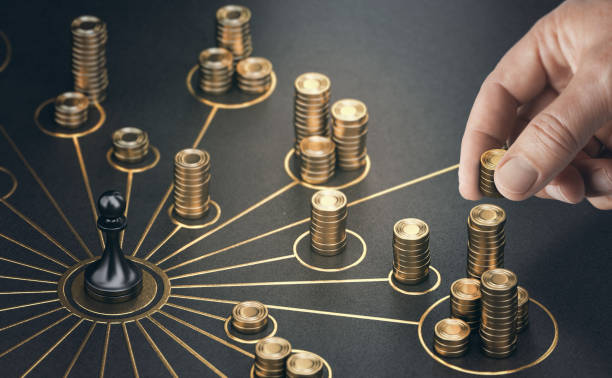





### Project Background
Tech sector has become one of the fastest growing tech ecosystems in the world with tech being one of the fastest growing sectors in Africa. This has led to a rise in demand for jobs in the industry.
However, unlike other parts of the world, information on remuneration in these jobs remains hard to come by. Existing resources such as glassdoor and brighter monday have limited information on salaries in Africa.
Over the past few years, it has been observed that foreign companies enter the African Market, offering more competitive salaries compared to local companies resulting in mass movement of experienced developers into these new roles.
This project seeks to solve this problem by developing a platform that can predict developer salaries based on their personal information, and also, providing comparison between different incomes in different regions for similar roles.


### Stakeholders:
- Jobseekers
- Employers
- Recruitment agencies

### Business Understanding
Salary negotiation can be a critical stage in the job search process, and job seekers often encounter various challenges during this phase like lack of information on salary trends. This means that a jobseeker might spend valuable time researching industry salary trends. Some might not be so lucky as the information might be non existent.

As the Tech labour market becomes more competitive, offering the right salary for new and current employees is crucial for employers as it means keeping or losing a valued resource. Thus it is imperative for them to offer fair and competitive compensation that is benchmarked to their industry

Our project looks at coming up with salary prediction model to help both jobseekers and employers with the above challenges. We will focus on the tech industry (developers) and use data from stackoverflow's annual developer survey.

### Problem statement
Our solution to the problem of inadequate salary data for both employees and employers is to develop a salary prediction model, to estimate salaries based on relevant job specifications. The model will assist in making informed decisions related to compensation and provide valuable insights for both job seekers and employers.

The salary prediction model will enable job seekers to have a better understanding of the salary expectations associated with their qualifications and experience.

Employers can use the model to make informed decisions regarding fair compensation packages for new hires or salary adjustments for existing employees.

Job sites like linkedin, glassdoor, brigther monday can use this model for jobs displayed on the sites by quoting the estimated salaries


### Objectives

The main objective of this project is to come up with a salary prediction model that will:

- Enable Jobseekers to negotiate for competitive salaries during job contract.
- Assist employers in offering fair compensation to their employees.
- Assist Recruitment agencies offer accurate salary estimates to their clients.

These objectives will be achieved through the following specific objectives:
1. To select the most important features in the dataset to be used in Salary prediction.
2. To describe how features such as Proffessional experience and Education level affect Annual compensation.
3. To build multiple classification models and identify the most suitable model to be used in the prediction.
4. To deploy the model using streamlit as an online dashboard.

### Success Metrics

The metrics to be used to measure the success of the model is:
- Accuracy - 71%


- Root Mean Squared Error(RMSE) of close to 0 to evaluate the model efficiency


### Data Understanding
The data comes from [stakoverflow annual developer survey](https://insights.stackoverflow.com/survey/) for 2022. Each row shows the responses given by a developer. It has 73268 rows and  79 columns. The data has missing values, but no duplicate rows.

The target variable ConvertedCompYearly shows the annual salary for each developer.

The data contains responses from 180 countries.


In [329]:
# import all required modules
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

import category_encoders as ce

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error, mean_absolute_error, r2_score


import pickle

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)


In [330]:
def read_data(path):

    """A simple function to load data"""

    data = pd.read_csv(path)
    return data

original_df = pd.read_csv('survey_results_public.csv')

#create a copy of the dataset

df = original_df.copy()
df.head(2)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN


#### Class for Understanding Dataset
Below we create a class to:
- Give data dimensions

- Display column info

- Give descriptive stats on numerical columns

- Check data types, duplicates & missing values



In [331]:
# class to describe dataset

class Describer:

    # initialize object

    def __init__(self, df):
        self.df = df

    # method to check shape of data

    def shape(self):
        out = print(f"The DataFrame has:\n\t* {self.df.shape[0]} rows\n\t* {self.df.shape[1]} columns", '\n')
        return out

    # method to check info on dataset

    def data_info(self):
        out = print(self.df.info(), '\n')
        return out

    # method to describe numerical columns

    def data_describe(self):
        out = self.df.describe()
        return out

    # method to check data types

    def data_type(self):

        print("Data has",len( df.select_dtypes(include='number').columns),
                "Numeric columns")

        print("and", len(df.select_dtypes(include='object').columns),
          "Categorical columns")

        print('*******************')
        print('*******************')

        print('Numerical Columns:', df.select_dtypes(include='number').columns)
        print('Categorical Coulumns:', df.select_dtypes(include='object').columns)

        return None

    # check duplicates

    def check_duplicates(self):
        duplicates = []

        for i in df.duplicated():
            duplicates.append(i)
        duplicates_set = set(duplicates)
        if(len(duplicates_set) == 1):
            print('The Dataset has No Duplicates')

        else:
            duplicates_percentage = np.round(((sum(duplicates)/len(df)) * 100 ), 2)
            print(f'Duplicated rows constitute of {duplicates_percentage} % of our dataset')

        return None

    # method to check missing values

    def missing_values(self):


        if df.isnull().any().any() == False :

            print("There Are No Missing Values")

        else:

            missing_values = df.isnull().sum().sort_values(ascending=False)

            missing_val_percent = ((df.isnull().sum()/len(df)).sort_values(ascending=False))

            missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage %': missing_val_percent})

            return missing_df[missing_df['Percentage %'] > 0]

# creating an instance of the class describer

describe_df = Describer(df)

# lets view the shape of the data

describe_df.shape()

# lets check for duplicates

describe_df.check_duplicates()

# lets describe data types

describe_df.data_type()

# lets view the info of the data

describe_df.data_info()

# lets describe numerical cols

describe_df.data_describe()

# lets get missing values

describe_df.missing_values()




The DataFrame has:
	* 73268 rows
	* 79 columns 

The Dataset has No Duplicates
Data has 6 Numeric columns
and 73 Categorical columns
*******************
*******************
Numerical Columns: Index(['ResponseId', 'CompTotal', 'VCHostingPersonal use',
       'VCHostingProfessional use', 'WorkExp', 'ConvertedCompYearly'],
      dtype='object')
Categorical Coulumns: Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 

,Missing Values,Percentage %
VCHostingProfessional use,73268,1.000000
VCHostingPersonal use,73268,1.000000
LearnCodeCoursesCert,43879,0.598884
OfficeStackAsyncWantToWorkWith,41196,0.562265
Frequency_3,38753,0.528921
...,...,...
EdLevel,1697,0.023162
SOAccount,1696,0.023148
LearnCode,1688,0.023039
Employment,1559,0.021278


### Observation
From the above outputs of the class:
- The Dataset has no duplicates
- Data has 6 numeric columns and 73 categorical columns
- 77 columns have missing values, ranging from 2% (`country` column) to 100% (`VCHostingProfessional use` & `VCHostingPersonal use` columns).

### Data Cleaning
The data cleaning process will entail the following:
- Renaming clumsily worded columns for easier understanding
- Dealing with missing data from the 77 columns
- Drop columns with 100% missing data

In [332]:
class DataProcessor:
    def __init__(self, df):
        self.df = df
    def rename_columns(self, cols_file):
        cols = pd.read_csv(cols_file, sep='\t')
        cols_dict = dict(zip(cols['Old'], cols['New']))
        self.df = self.df.rename(columns=cols_dict)
        return self.df
    def drop_columns(self, columns):
        drop_column = self.df.drop(columns=columns, axis=1)
        self.df = drop_column
        return self.df
    def missing_values(self):
        if self.df.isnull().any().any() == False:
            print("There Are No Missing Values")
        else:
            missing_values = self.df.isnull().sum().sort_values(ascending=False)
            missing_val_percent = (self.df.isnull().sum() / len(self.df)).sort_values(ascending=False)
            missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage %': missing_val_percent})
            return missing_df[missing_df['Percentage %'] > 0]
    def fill_pds(self):
        self.df['Participation_PDS'] = self.df['Participation_PDS'].fillna('No')
        return self.df
    def replace_na(self):
        for index, row in self.df.iterrows():
            if row['Participation_PDS'] == 'No':
                self.df.loc[index, 'Contributor_or_Manager':'Learning_Support'] = 'Not Answered'
        return self.df
    def replace_yesna(self, columns_range, valuefill):
        self.df[columns_range] = self.df[columns_range].fillna(valuefill)
        return self.df
    def len_eas(self):
        self.df['SurveyLength'].fillna('Appropriate in length', inplace=True)
        self.df['SurveyEase'].fillna('Easy', inplace=True)
        return self.df
    def missing_vals(self):
        missing_percentages = self.df.isnull().mean(axis=1) * 100
        rows_20_percent_missing = self.df[missing_percentages >= 20]
        rows_50_percent_missing = self.df[missing_percentages >= 50]
        rows_60_percent_missing = self.df[missing_percentages >= 60]
        rows_70_percent_missing = self.df[missing_percentages >= 70]
        print("20% missing:", len(rows_20_percent_missing),
              "50% missing:", len(rows_50_percent_missing),
              "60% missing:", len(rows_60_percent_missing),
              "70% missing:", len(rows_70_percent_missing))
    def drop_50(self):
        threshold = len(self.df.columns) * 0.5
        self.df = self.df.dropna(thresh=threshold)
        return self.df
    def rename_values(self, column, mapping):
        self.df[column] = self.df[column].replace(mapping)
        return self.df
processor = DataProcessor(df)

#### Renaming Columns
When going through the data, we noticed some clumsily worded columns. To make the data easier to understand, we came up with new names. Below we code a function that will take in the new and old names as key-value pairs, then use these to rename the columns in the dataframe.


In [333]:
processor.rename_columns('cols.txt').head()

,ResponseId,Developer_Description,Employment_Status,Remote_vs_Onsite,Outofwork_Coding,Education_Level,Learn_Code_Method,Learn_Code_Source,Code_Certifications,Coding_Experience,...,TimeSearching_Answers,TimeAnswering,Onboarding_Duration,ProfessionalTech,Is_Involved_Onboarding,Employer_Learning_Resources,Learning_Support,SurveyLength,SurveyEase,Annual_Salary
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


#### Observation
We have run the function below and confirmed renaming of a few columns,
e.g. columns 3 to 5

### Cleaning Missing Data


In [334]:
#previewing missing values
describe_df.missing_values()

,Missing Values,Percentage %
VCHostingProfessional use,73268,1.000000
VCHostingPersonal use,73268,1.000000
LearnCodeCoursesCert,43879,0.598884
OfficeStackAsyncWantToWorkWith,41196,0.562265
Frequency_3,38753,0.528921
...,...,...
EdLevel,1697,0.023162
SOAccount,1696,0.023148
LearnCode,1688,0.023039
Employment,1559,0.021278


#### Observation
`VCHostingProfessional use` and `VCHostingPersonal use` columns have no data, hence have 100% missing values. 

We drop these 2 columns for this reason

In [335]:
# Define the list of columns to drop

columns_to_drop = ['VCHostingProfessional use', 'VCHostingPersonal use']

# Call the dropping_columns() method to drop the specified columns

df = processor.drop_columns(columns_to_drop)

In [336]:
#previewing missing values

describe_df.missing_values()

,Missing Values,Percentage %
Code_Certifications,43879,0.598884
Proj_Mgmt_WantToWorkWith,41196,0.562265
Knowledge_Silos,38753,0.528921
ProfessionalTech,38362,0.523585
Siloed_Teams,38295,0.522670
...,...,...
Education_Level,1697,0.023162
SOAccount_Ownership,1696,0.023148
Learn_Code_Method,1688,0.023039
Employment_Status,1559,0.021278


### Columns With Legitimately Missing Values
The column `Participation_PDS` allowed a developer to choose wether or not they would answer the subsequent 20 questions.

This means that the missing values are valid.

In `Participation_PDS` we will replace NA with No, then in the subsequent PDS questions, replace NA with Not Answered

In [337]:
# Fill missing values in the 'Participation_PDS' column

df = processor.fill_pds()

# Get the unique values from the 'Participation_PDS' column

unique_values = df['Participation_PDS'].unique()

# Print the unique values

print(unique_values)

['No' 'Yes']


We will go ahead and do the same to the subsequent columns ranging from 'Contributor_or_Manager' to 'Learning_Support but replace NA with Not Answered like we stated before

In [338]:
# Call the replace_na() method to replace NA values in specified columns

df = processor.replace_na()

df.head(2)

,ResponseId,Developer_Description,Employment_Status,Remote_vs_Onsite,Outofwork_Coding,Education_Level,Learn_Code_Method,Learn_Code_Source,Code_Certifications,Coding_Experience,...,TimeSearching_Answers,TimeAnswering,Onboarding_Duration,ProfessionalTech,Is_Involved_Onboarding,Employer_Learning_Resources,Learning_Support,SurveyLength,SurveyEase,Annual_Salary
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Too long,Difficult,NaN


In [339]:
#preview missing values 

describe_df.missing_values()

,Missing Values,Percentage %
Code_Certifications,43879,0.598884
Proj_Mgmt_WantToWorkWith,41196,0.562265
MiscTechWantToWorkWith,36458,0.497598
Annual_Salary,35197,0.480387
Total_Salary,34846,0.475596
...,...,...
Is_Involved_Onboarding,1381,0.018849
TimeAnswering,1178,0.016078
TimeSearching_Answers,1002,0.013676
Contributor_or_Manager,917,0.012516


After cleaning the legitimate missing columns above, we expected subsequent values to contain no missing data. However, on inspecting some 'Yes' values in  `Participation_PDS` we realised they also had some missing values in the subsequent columns. 

Below we clean these missing values by assigning them to 'Not Answered'

In [340]:
# Define the range of columns and the value to fill

columns_range = ['Contributor_or_Manager', 'WorkExp', 'Extroverted', 'Siloed_Teams',
                 'Information_Availability', 'Well_Resourced', 'Info_Answ_Resource',
                 'Recurring_Responses', 'Workflow_Interruptions', 'External_Team_Assistance',
                 'External_Team_Interaction', 'Knowledge_Silos', 'TimeSearching_Answers',
                 'TimeAnswering', 'Onboarding_Duration', 'ProfessionalTech',
                 'Is_Involved_Onboarding', 'Employer_Learning_Resources', 'Learning_Support']

# Call the replace_yesna() method to replace 'Yes' values in specified columns

df = processor.replace_yesna(columns_range, 'Not Answered')

#### Cleaning Survey Length and Survey Ease Columns

To replace the missing values of `SurveyLength` and `SurveyEase`, we reviewed the most common values in both columns. In the former, 'Appropriate in length' is 76% while in the latter, 'Easy' is 67%. 

In [341]:
print("Survey Length \n",df.SurveyLength.value_counts(normalize=True))
print('**************************************************************')
print("Survey Ease \n", df.SurveyEase.value_counts(normalize=True))

Survey Length 
 Appropriate in length    0.764905
Too long                 0.205709
Too short                0.029385
Name: SurveyLength, dtype: float64
**************************************************************
Survey Ease 
 Easy                          0.679157
Neither easy nor difficult    0.306731
Difficult                     0.014112
Name: SurveyEase, dtype: float64


> Below we use these 2 values: appropriate in length and easy to fill missing values for the 2 columns

In [342]:
#call method len_eas to fill missing values in survey columns 

df = processor.len_eas()

Lets preview the remaining missing values

In [343]:
#we will use describer class to preview remaining missin values 

describe_df.missing_values()

,Missing Values,Percentage %
Code_Certifications,43879,0.598884
Proj_Mgmt_WantToWorkWith,41196,0.562265
MiscTechWantToWorkWith,36458,0.497598
Annual_Salary,35197,0.480387
Total_Salary,34846,0.475596
PlatformWantToWorkWith,32853,0.448395
Salary_Frequency,28843,0.393664
MiscTechHaveWorkedWith,28276,0.385926
WebframeWantToWorkWith,27146,0.370503
Proj_Mgmt_HVWorkedWith,27045,0.369124


Below we select rows with 20% - 70% missing values in all columns. 

Looking at the sample distribution of missing values - We will **drop all rows with more than 50% missing values** as they quality of their responses are doubtful

In [344]:
#we will use class dataprocessor to preview the % of missing values 

processor.missing_vals()

20% missing: 14802 50% missing: 1557 60% missing: 1510 70% missing: 0


In [345]:
# Call method to drop rows with more than 50%missing values
df = processor.drop_50()

>lets check the shape of the data frame after dropping the rows 

In [346]:

def check_shape(data):

    """A simple function to preview the shape of the dataset"""

    shape = data.shape
    return shape

check_shape(df)

(71711, 77)

#### Drop `Total_Salary`, `Salary_Frequency` and `Currency` Columns
These columns are used to compute `Annual_Salary` column, which is our target variable. Thus they should not form part of the feature variables

In [347]:
# list of columns to drop

columns_to_drop1 = ['Total_Salary', 'Salary_Frequency', 'Currency']

# calling function to drop columns

df = processor.drop_columns(columns_to_drop1)

# previewing shape of the dataframe

check_shape(df)

(71711, 74)

#### Handle Missing Values with None of the Above
The columns below have valid missing values because the response options did not allow the developers specify the responses that did not apply to them. For example in the column `Code_Certifications` asks developers the online resources they used to learn coding. However, it is possible that some people didn't use these resources because they learned coding in the degree courses for example. Since this option misses from the responses, those develpers opted to skip for this reason. The same logic applies to the remaining columns selected below

In [348]:
# create list of columns
cols1 = """Code_Certifications
Proj_Mgmt_WantToWorkWith
MiscTechWantToWorkWith
PlatformWantToWorkWith
MiscTechHaveWorkedWith
WebframeWantToWorkWith
Proj_Mgmt_HVWorkedWith
ToolsTechWantToWorkWith
Proj_Mgmt_SyncWantToWorkWith
PlatformHaveWorkedWith
Learn_Code_Source
PurchaseInfluence
DatabaseWantToWorkWith
WebframeHaveWorkedWith
ToolsTechHaveWorkedWith
Outofwork_Coding
DevType
Proj_Mgmt_SyncHaveWorkedWith
NEWCollabToolsWantToWorkWith
MentalHealth
LanguageWantToWorkWith
Disability
Purchase_Research
VCInteraction
NEWCollabToolsHaveWorkedWith
New_Stack_Overfl_Sites
OrgSize
Remote_vs_Onsite
DatabaseHaveWorkedWith"""

#create a function for columns mentioned above 
def listcols(cols):
    
    # split everyword in new line 
    
    cols_list = cols.split('\n')
    
    cols_list = [col.strip() for col in cols_list if col.strip()]
    
    #return the list of the split words 
    return cols_list

#assign 
cols_list = listcols(cols1)
print(cols_list)

['Code_Certifications', 'Proj_Mgmt_WantToWorkWith', 'MiscTechWantToWorkWith', 'PlatformWantToWorkWith', 'MiscTechHaveWorkedWith', 'WebframeWantToWorkWith', 'Proj_Mgmt_HVWorkedWith', 'ToolsTechWantToWorkWith', 'Proj_Mgmt_SyncWantToWorkWith', 'PlatformHaveWorkedWith', 'Learn_Code_Source', 'PurchaseInfluence', 'DatabaseWantToWorkWith', 'WebframeHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'Outofwork_Coding', 'DevType', 'Proj_Mgmt_SyncHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'MentalHealth', 'LanguageWantToWorkWith', 'Disability', 'Purchase_Research', 'VCInteraction', 'NEWCollabToolsHaveWorkedWith', 'New_Stack_Overfl_Sites', 'OrgSize', 'Remote_vs_Onsite', 'DatabaseHaveWorkedWith']


In [349]:
# use class dataprocessor to fill in list of columns with None

df = processor.replace_yesna(cols_list,'None of the Above')

# let's preview one of the columns to check if response was changed to None of the Above

df.Code_Certifications.value_counts()

None of the Above                                        42323
Udemy                                                     5643
Other                                                     2593
Coursera;Udemy                                            1893
Udemy;Codecademy                                          1472
                                                         ...  
Coursera;Udemy;Codecademy;Pluralsight;Other;Skillsoft        1
Coursera;Udemy;Pluralsight;edX;Other;Skillsoft               1
Coursera;edX;Skillsoft                                       1
Pluralsight;edX;Udacity;Other                                1
Codecademy;Pluralsight;Other;Skillsoft                       1
Name: Code_Certifications, Length: 207, dtype: int64

#### Missing Values filled With One of the Response Options
For this set of columns, we have identified a criteria to fill in the missing values based on the response distribution. For example:

- Demographic variable missing values are filled with preferred not to say option due to sensitivity

- Some other variables filled with the most common response option based on domain knowledge e.g operating systems used

- While some filled with 'not sure/can't rememember'- e.g. blockchain sentiments

In [350]:
# Define mapping for renaming values in the 'Pro_Experience' column

mapping_pro_experience = {'Less than 1 year': 0.5, 'More than 50 years': 50}

# Call the 'rename_values()' method of the 'DataProcessor' class to rename values in the 'Pro_Experience' column

df = processor.rename_values('Pro_Experience', mapping_pro_experience)

# Define the mapping for renaming values in the 'Coding_Experience' column

mapping_coding_experience = {'Less than 1 year': 0.5, 'More than 50 years': 50}

# Call the 'rename_values()' method of the 'DataProcessor' class to rename values in the 'Coding_Experience' column

df = processor.rename_values('Coding_Experience', mapping_coding_experience)

In [351]:
# cols to fill with 'Prefer not to say'

demo = ['Sexuality', 'Ethnicity', 'Trans', 'Gender']

df = processor.replace_yesna(demo,'Prefer not to say')

# cols to fill with 'I prefer not to say'

col = ['Employment_Status']

df = processor.replace_yesna(col, 'I prefer not to say')

# fill Age with '25-34 years old'

col_1 = ['Age']

df = processor.replace_yesna(col_1, '25-34 years old')

# fill 'OpSysPersonal use' & 'OpSysProfessional use' with 'Windows'

ops = ['OpSysPersonal_use', 'OpSysProfessional_use']

df = processor.replace_yesna(ops,'Windows')

# fill  SOVisitFreq with 'Daily or almost daily'

col_2 = ['SOVisitFreq']

df = processor.replace_yesna(col_2, 'Daily or almost daily')

# fill Blockchain_Sentiment with 'Unsure'

col_3 = ['Blockchain_Sentiment']

df = processor.replace_yesna(col_3,'Unsure')

# fill Coding_Experience, Pro_Experience with median

df['Coding_Experience'].fillna(df['Coding_Experience'].median(), inplace=True)

df['Pro_Experience'].fillna(df['Pro_Experience'].median(), inplace=True)

# fill VersionControlSystem with 'I don't use one'

col_4 = ['VersionControlSystem']

df = processor.replace_yesna(col_4, "I don't use one")

# fill Belong_SO_Comm with 'Not sure'

col_5 = ['Belong_SO_Comm']

df = processor.replace_yesna(col_5, "Not sure")

# fill Education_Level with 'Something else'

col_6 = ['Education_Level']

df = processor.replace_yesna(col_6, "Something else")

# fill SOAccount_Ownership with Not sure/can't remember

col_7 = ['SOAccount_Ownership']

df = processor.replace_yesna(col_7,"Not sure/can't remember")

# fill Learn_Code_Method with 'I don't use one'

col_8 = ['Learn_Code_Method']

df = processor.replace_yesna(col_8, "I don't use one")

# fill SOA_ParticipationFreq with 'Less than once per month or monthly'

col_9 = ['SOA_ParticipationFreq']

df = processor.replace_yesna(col_9, "Less than once per month or monthly")

# fill LanguageHaveWorkedWith with 'HTML/CSS'

col_10 = ['LanguageHaveWorkedWith']

df = processor.replace_yesna(col_10,"HTML/CSS")

#### Handling Multiple Response Values
From the profiles analysis, the columns below were discovered to contain multiple and fragmented respones for each row, which masked the true distribution across categories due to unique combination of values contained in each row. 

To untangle the values and have unique responses, **we will select the first mentioned response**. 

Our rationale is that this responses for e.g in `Code_Certifications` represents the online resource that was used most **often, was most impactful, or most memorable to the developer**. The same arguement holds for the other columns.

In [352]:
# function to extract first mentions

def extract_first_value_from_columns(df, columns):
    first_values = {}
    for col in columns:
        first_values[col] = df[col].apply(lambda x: x.split(";")[0].strip() if isinstance(x, str) and ";" in x else x)
    return pd.DataFrame(first_values)

# columns to be cleaned

colslist = ['Code_Certifications', 'Proj_Mgmt_WantToWorkWith', 'MiscTechWantToWorkWith', 'PlatformWantToWorkWith',
'WebframeWantToWorkWith', 'Proj_Mgmt_HVWorkedWith', 'ToolsTechWantToWorkWith', 'Proj_Mgmt_SyncWantToWorkWith',
'PlatformHaveWorkedWith', 'Learn_Code_Source', 'DatabaseWantToWorkWith', 'WebframeHaveWorkedWith',
'ToolsTechHaveWorkedWith', 'Outofwork_Coding', 'DatabaseHaveWorkedWith', 'DevType',
'Proj_Mgmt_SyncHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSysProfessional_use', 'MentalHealth',
'Sexuality', 'LanguageWantToWorkWith', 'Disability', 'Purchase_Research', 'VCInteraction', 'Ethnicity',
'NEWCollabToolsHaveWorkedWith', 'OpSysPersonal_use', 'LanguageHaveWorkedWith', 'New_Stack_Overfl_Sites',
'VersionControlSystem', 'Learn_Code_Method', 'Employment_Status', 'Gender', 'ProfessionalTech']

# data with cols of first mentions

zer = extract_first_value_from_columns(df, colslist)

# replace the colslist in df with cleaned data from zer dataframe

df[colslist] = zer

###  Cleaning   Annual_Salary  feature 

To clean this column's missing values, we will look at:

- The employment of each respondent. For unemployed and students without salary values, we will replace missing values with 0 as it is unrealistic to impute values for this group

- The salary distribution at a regional level (e.g. salaries in Africa would differ from Europe), then use the appropriate median value


In [355]:
#check remaining missing values using the describer method 

describe_df.missing_values()

,Missing Values,Percentage %
Annual_Salary,33640,0.469105


In [356]:
# for those who don't work and have no salary

# fill missing salary with 0

nonwork = ['Student, full-time', 'Student, part-time',
       'Not employed, but looking for work',
 'Not employed, and not looking for work',
       'Retired', 'I prefer not to say']

df.loc[(df['Employment_Status'].isin(nonwork)) & (df['Annual_Salary'].isna()), 'Annual_Salary'] = 0

# confirm that the replace has worked

print(df.Annual_Salary.value_counts().head(), '\n')

# confirm that other null values still exist

print('remaining missing values: ', df.Annual_Salary.isna().sum())

0.0         15964
150000.0      393
200000.0      362
120000.0      341
63986.0       304
Name: Annual_Salary, dtype: int64 

remaining missing values:  17676


In [357]:
# countries grouped into continents

continents = {
    'Asia': ['Israel', 'Hong Kong (S.A.R.)', 'India', 'China', 'Singapore', 'Iraq',
             'Philippines', 'Iran, Islamic Republic of...', 'Indonesia', 'Afghanistan',
             'Viet Nam', 'South Korea', 'Taiwan', 'Japan', 'Thailand', 'Bangladesh',
             'Nepal', 'United Arab Emirates', 'Pakistan', 'Sri Lanka', 'Azerbaijan',
             'Uzbekistan', 'Kazakhstan', 'North Korea', 'Timor-Leste', 'Brunei Darussalam',
             'Oman', 'Saudi Arabia', 'Maldives', 'Jordan', 'Bahrain', 'Republic of Korea',
            'Lebanon', 'Malaysia', "Lao People's Democratic Republic", 'Syrian Arab Republic',
            'Qatar', 'Kyrgyzstan', 'Cambodia', 'Yemen', 'Mongolia', 'Tajikistan', 'Myanmar',
            'Kuwait', 'Turkmenistan', 'Palestine', 'Bhutan'],
    'Oceania': ['Australia', 'New Zealand', 'Fiji', 'Solomon Islands', 'Papua New Guinea',
                'Palau'],
    'North America': ['Canada', 'United States of America', 'Mexico', 'Dominican Republic',
                     'Costa Rica', 'Nicaragua', 'Belize', 'Guatemala', 'El Salvador',
                     'Jamaica', 'Cuba', 'Panama', 'Bahamas', 'Barbados', 'Antigua and Barbuda',
                      'Haiti', 'Saint Lucia', 'Saint Kitts and Nevis'],
    'Europe': ['Croatia', 'Netherlands', 'Czech Republic', 'Sweden', 'Denmark',
               'Finland', 'United Kingdom of Great Britain and Northern Ireland',
               'Austria', 'France', 'Portugal', 'Belgium', 'Ireland', 'Iceland',
               'Montenegro', 'Germany', 'Belarus', 'Switzerland', 'Poland',
               'Ukraine', 'Russia', 'Serbia', 'Luxembourg', 'Spain', 'Norway',
               'Romania', 'Italy', 'Turkey', 'Greece', 'Hungary', 'Malta',
               'Estonia', 'Slovenia', 'Bosnia and Herzegovina', 'Bulgaria',
               'Georgia', 'Latvia', 'Lithuania', 'Moldova', 'Macedonia (FYROM)', 'Armenia',
               'Monaco', 'Slovakia', 'Cyprus', 'Russian Federation',
              'The former Yugoslav Republic of Macedonia', 'Andorra', 'Nomadic', 'Albania',
              'Republic of Moldova', 'Kosovo', 'Isle of Man', 'San Marino'],
    'Africa': ['Madagascar', 'South Africa', 'Swaziland', 'Mali', 'Egypt', 'Nigeria',
               'Tunisia', 'Cameroon', 'Ethiopia', 'Ghana', 'Rwanda', 'Senegal',
               'Chad', 'Benin', 'Angola', 'Namibia', 'Malawi', 'Sierra Leone',
               'Zimbabwe', 'Mauritius', 'Morocco', 'Kenya', 'Botswana', 'Liberia', 'Lesotho',
               'Guinea', 'Gabon', 'Seychelles', 'Algeria', 'Zambia', 'Uganda',
              'United Republic of Tanzania', 'Niger', 'Cape Verde', 'Libyan Arab Jamahiriya',
              'Togo', 'Sudan', 'Democratic Republic of the Congo', "Côte d'Ivoire",
              'Congo, Republic of the...', 'Somalia', 'Mozambique', 'Mauritania',
              'Burkina Faso', 'Gambia', 'Djibouti'],
    'South America': ['Brazil', 'Argentina', 'Colombia', 'Chile', 'Peru',
                      'Venezuela, Bolivarian Republic of...', 'Bolivia', 'Paraguay',
                      'Ecuador', 'Uruguay', 'Honduras', 'Trinidad and Tobago', 'Suriname',
                     'Guyana']
}

In [358]:
# Create the 'continents' column by mapping the 'countries' column to the continents dictionary

df['continents'] = df['Country'].map({country: continent for continent, countries in continents.items()
                                        for country in countries})

In [359]:
# get median salary for each continent

salo = df[df.Annual_Salary > 0].groupby('continents')['Annual_Salary'].median()
salo

continents
Africa            18126.0
Asia              23215.0
Europe            59720.0
North America    132000.0
Oceania           92002.0
South America     27008.5
Name: Annual_Salary, dtype: float64

In [360]:
continent_mapping = {
    'Africa': 18126.0,
    'Asia': 23215.0,
    'Europe': 59720.0,
    'North America': 132000.0,
    'Oceania': 92002.0,
    'South America': 27008.5}

df['Annual_Salary'] = df.groupby('continents')['Annual_Salary'].apply(lambda x: x.fillna(continent_mapping[x.name]))

df.Annual_Salary.isna().sum()

0

In [361]:
# preview salary columnn after handling missing values

df[['continents', 'Country', 'Annual_Salary']].head()

,continents,Country,Annual_Salary
1,North America,Canada,132000.0
2,Europe,United Kingdom of Great Britain and Northern I...,40205.0
3,Asia,Israel,215232.0
4,North America,United States of America,132000.0
5,Europe,Germany,0.0


In [362]:
# confirm no more missing values

describe_df.missing_values()

There Are No Missing Values


#### Handling Nonsensical Values of Annual_Salary
On further investigation of target column, we realise that some respondents entered nonsensical values like USD 1 as their Annual_Salary.

Below we come up with afew categories that will help us to bin the salary values to specific categories

In [363]:
# inspect salary values between USD 1 and USD 4999

unrealistic_salary = df[(df['Annual_Salary'] != 0) & (df['Annual_Salary'] <= 5000)][['Annual_Salary', 'Employment_Status', 'Country', 'Pro_Experience', 'continents']].sort_values(
    by='Annual_Salary')

unrealistic_salary.head(4)

,Annual_Salary,Employment_Status,Country,Pro_Experience,continents
39915,1.0,"Employed, full-time",India,11,Asia
65742,1.0,"Employed, full-time",India,2,Asia
19912,1.0,I prefer not to say,Belgium,50,Europe
64366,1.0,"Employed, full-time",United States of America,0.5,North America


In [364]:
# we  refrence employment column and replace unrealistic_salary for students, retired, no work
df.loc[(df['Employment_Status'].isin(nonwork)) & (df['Annual_Salary'] != 0)
       & (df['Annual_Salary'] <= 5000), 'Annual_Salary'] = 0

#### Nonrealistic values in annual salary for employment status 

In the employed Status rows for columns with this discription **Employed, full-time', 'Independent contractor, freelancer, or self-employed', 'Employed, part-time''**

We will fill this categories with **nan** because they prefered not sharing information 


In [365]:
# inspect salary values between USD 1 and USD 4999

unrealistic_salary.head(400)

,Annual_Salary,Employment_Status,Country,Pro_Experience,continents
39915,1.0,"Employed, full-time",India,11,Asia
65742,1.0,"Employed, full-time",India,2,Asia
19912,1.0,I prefer not to say,Belgium,50,Europe
64366,1.0,"Employed, full-time",United States of America,0.5,North America
52005,1.0,"Employed, full-time",Viet Nam,5,Asia
...,...,...,...,...,...
38692,1443.0,"Independent contractor, freelancer, or self-em...",Nigeria,8,Africa
32130,1452.0,"Employed, full-time",Nepal,2,Asia
60714,1452.0,"Employed, full-time",Argentina,19,South America
62312,1452.0,"Employed, full-time",Nepal,1,Asia


In [366]:
#In the employed rows for columns with this discription below we will fill with null 

work = ['Employed, full-time', 'Independent contractor, freelancer, or self-employed', 'Employed, part-time']

#replace workers with unrealistic_salary  with null

df.loc[(df['Employment_Status'].isin(work)) & (df['Annual_Salary'] != 0)
       & (df['Annual_Salary'] <= 5000), 'Annual_Salary'] = np.nan

In [367]:
# replace unrealistic_salary for workers

df['Annual_Salary'] = df.groupby('continents')['Annual_Salary'].apply(lambda x: x.fillna(continent_mapping[x.name]))

In [368]:
# confirm no missing values

describe_df.missing_values()

There Are No Missing Values


# Outliers
We have 1 numerical column Annual Salary. Below codes are checking for outliers

In [369]:
class outliers:
    def __init__(self, data):
        self.data = data
    
    def check_outliers(self, col):
        
        series_num = self.data[col]
        mean = np.mean(series_num)
        std = np.std(series_num)
        threshold = 3
        outlrs = self.data[np.abs((series_num - mean) / std) > threshold]
        return outlrs
    
    def outlier_box_plot(self, col):
        #boxplot to check outliers
        plt.figure(figsize=(10, 6))
        plt.boxplot(self.data[col])
        plt.ylabel(col)
        plt.yscale('log')
        plt.title('Boxplot of Salaries')
        plt.show()
        

#Instantiate  class outliers 

outlier_detector = outliers(df)

#now check outliers 

outlires = outlier_detector.check_outliers('Annual_Salary')
print("The Number of Outliers in the 'Annual_Salary' Column:", len(outlires))
print('Outliers: ')
outlires.head(2)

The Number of Outliers in the 'Annual_Salary' Column: 454
Outliers: 


,ResponseId,Developer_Description,Employment_Status,Remote_vs_Onsite,Outofwork_Coding,Education_Level,Learn_Code_Method,Learn_Code_Source,Code_Certifications,Coding_Experience,...,TimeAnswering,Onboarding_Duration,ProfessionalTech,Is_Involved_Onboarding,Employer_Learning_Resources,Learning_Support,SurveyLength,SurveyEase,Annual_Salary,continents
117,118,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,Some college/university study without earning ...,Books / Physical media,None of the Above,None of the Above,32,...,15-30 minutes a day,Very short,DevOps function,Yes,No,Yes,Appropriate in length,Easy,6000000.0,North America
201,202,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation,Coursera,9,...,Less than 15 minutes a day,Somewhat long,Innersource initiative,Yes,Yes,Yes,Appropriate in length,Neither easy nor difficult,44790396.0,Europe


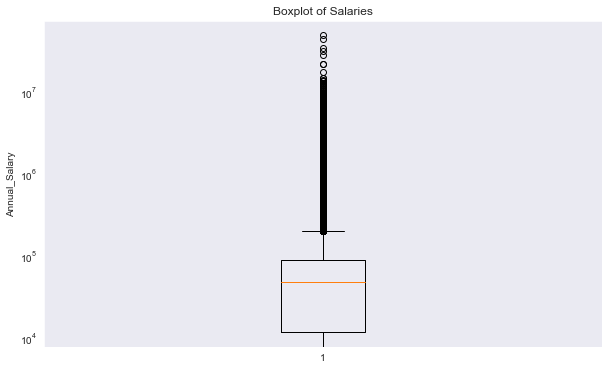

In [370]:
#boxplot for  outliers

outlier_detector.outlier_box_plot('Annual_Salary')

In [371]:
filtered_data = df[df['Annual_Salary'] == 0]
print(filtered_data.shape[0])
filtered_data.head(3)

15969


,ResponseId,Developer_Description,Employment_Status,Remote_vs_Onsite,Outofwork_Coding,Education_Level,Learn_Code_Method,Learn_Code_Source,Code_Certifications,Coding_Experience,...,TimeAnswering,Onboarding_Duration,ProfessionalTech,Is_Involved_Onboarding,Employer_Learning_Resources,Learning_Support,SurveyLength,SurveyEase,Annual_Salary,continents
5,6,"I am not primarily a developer, but I write co...","Student, full-time",None of the Above,None of the Above,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media,None of the Above,None of the Above,15,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Easy,0.0,Europe
6,7,I code primarily as a hobby,"Student, part-time",None of the Above,None of the Above,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Stack Overflow,None of the Above,3,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Easy,0.0,Asia
7,8,I am a developer by profession,"Not employed, but looking for work",None of the Above,None of the Above,Some college/university study without earning ...,Online Courses or Certification,None of the Above,Coursera,1,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Easy,0.0,Asia


### Outlier Observation 
* We have  455 outliers , the lowest Outlier in salary is : 1828416.0, the highest Outlier in salary is  : 50000000.0, we also have 0 salary values which are the highest in count.
* Considering this is real world data we not remove the outliers 

### Exploratory Data Analysis

We will explore a few varibales below to help us better understand our data:
- **Developer demographics** : continent, years of experience - work, age, gender, coding, education level, , where learned coding, remote vs onsite
- **Developer tools**: Language worked with, database worked with, cloud platforms worked with, version control, operating system
- **Annual_Salary** - histogram, boxplot. salary by continent, by educational level, years of experience

In [372]:
#create a class for Visualization 
class DataVisualizer:
    def __init__(self, df):
        self.df = df
        
    def plot_continent_distribution(self):
        plt.figure(figsize=(13,9))
        con = round(self.df['continents'].value_counts(normalize=True), 2)
        plt.bar(con.index, con.values, color='purple')
        plt.title('Developer Distribution by Continent')
        for i, v in enumerate(con.values):
            plt.text(i, v, str(v), ha='center', va='bottom')
        plt.xlabel('Continents')
        plt.ylabel('% Count')
        plt.show()
        
    def plot_experience_histogram(self):
        self.df['Pro_Experience'] = self.df['Pro_Experience'].astype(float)
        self.df['Coding_Experience'] = self.df['Coding_Experience'].astype(float)
        fig, axes = plt.subplots(ncols=2, figsize=(12, 8))
        fig.suptitle('Years of Experience: Professional & Coding')
        axes[0].hist(self.df['Pro_Experience'], color= 'purple')
        axes[0].axvline(self.df['Pro_Experience'].median(), c='r')
        axes[0].set_xlabel('Years of Professional Experience')
        axes[0].set_ylabel('Count')
        axes[1].hist(self.df['Coding_Experience'], color= 'purple')
        axes[1].axvline(self.df['Coding_Experience'].median(), c='r')
        axes[1].set_xlabel('Years of Coding Experience')
        axes[1].set_ylabel('Count')
        plt.legend(['Median', 'Median'])
        plt.show()
        
    def plot_age_gender_distribution(self):
        genl = ['In your own words:', 'LBGTQIA', 'I prefer not to say', 'Prefer not to say', 'Woman', 'Man']
        agedf = self.df['Age'].value_counts().sort_values(ascending=True)
        genddf = self.df['Gender'].value_counts().sort_values(ascending=True)

        # Filter the gender counts to include only the specified categories
        
        genddf = genddf.reindex(genl)

        fig, axes = plt.subplots(ncols=2, figsize=(18, 6))
        fig.suptitle('Age & Gender')

        axes[0].barh(agedf.index, agedf.values, color= 'purple')
        axes[0].set_ylabel('Age')
        axes[0].set_xlabel('Count')

        axes[1].barh(genddf.index, genddf.values, color= 'purple')
        axes[1].set_ylabel('Gender')
        axes[1].set_xlabel('Count')
        axes[1].set_yticks(range(len(genl)))
        axes[1].set_yticklabels(genl)
        plt.show()
    
    def plot_source_coding_skills(self):
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 18))
        plt.subplots_adjust(hspace=0.4, wspace=2.3)
        plt.figure(figsize=(10, 6))
        sns.countplot(data=self.df, y='Learn_Code_Method', order=self.df['Learn_Code_Method'].value_counts().index, palette='viridis', ax=axes[0,0])
        axes[0, 0].set_ylabel('Learn Code Method')
        axes[0, 0].set_xlabel('Count')
        axes[0, 0].set_title('Source of Coding Knowhow')
        sns.countplot(data=self.df, y='Learn_Code_Source', order=self.df['Learn_Code_Source'].value_counts().index, palette='viridis', ax=axes[0, 1])
        axes[0, 1].set_ylabel('Learn Code Source')
        axes[0, 1].set_xlabel('Count')
        axes[0, 1].set_title('Source of Coding Skill')
        sns.countplot(data=self.df, y='Code_Certifications', order=self.df['Code_Certifications'].value_counts().index, palette='viridis',ax=axes[1, 0])
        axes[1, 0].set_ylabel('Coding Certs')
        axes[1, 0].set_xlabel('Count')
        axes[1, 0].set_title('Coding Certs')
        sns.countplot(data=self.df, y='Education_Level', order=self.df['Education_Level'].value_counts().index, palette='viridis',ax=axes[1,1])
        axes[1, 1].set_ylabel('Education Level')
        axes[1, 1].set_xlabel('Count')
        axes[1, 1].set_title('Education Level')
        plt.show()
        
    def plot_employment_workstyle_distribution(self):
        empl = ['Retired', 'I prefer not to say', 'Not employed, not searching', 'Employed, part-time', 'Not employed, searching', 'Student, part-time', 'consultant/freelance', 'Student, full-time', 'Employed, full-time']
        wkstlls = ['Full in-person', 'None', 'Hybrid', 'Fully remote']
        emp = self.df['Employment_Status'].value_counts().sort_values(ascending=True)
        wkstl = self.df['Remote_vs_Onsite'].value_counts().sort_values(ascending=True)
        fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
        fig.suptitle('Employment Status & Work Style')
        axes[0].barh(emp.index, emp.values, color= 'purple')
        axes[0].set_ylabel('Employment Status')
        axes[0].set_xlabel('Count')
        axes[0].set_yticks(range(len(empl)))
        axes[0].set_yticklabels(empl)
        axes[1].barh(wkstl.index, wkstl.values, color= 'purple')
        axes[1].set_ylabel('Work Style')
        axes[1].set_xlabel('Count')
        axes[1].set_yticks(range(len(wkstlls)))
        axes[1].set_yticklabels(wkstlls)
        plt.show()
        

In [373]:
#Create an instance of the DataVisualizer class  

data_visualizer = DataVisualizer(df)

#### Developer Distribution by Continent


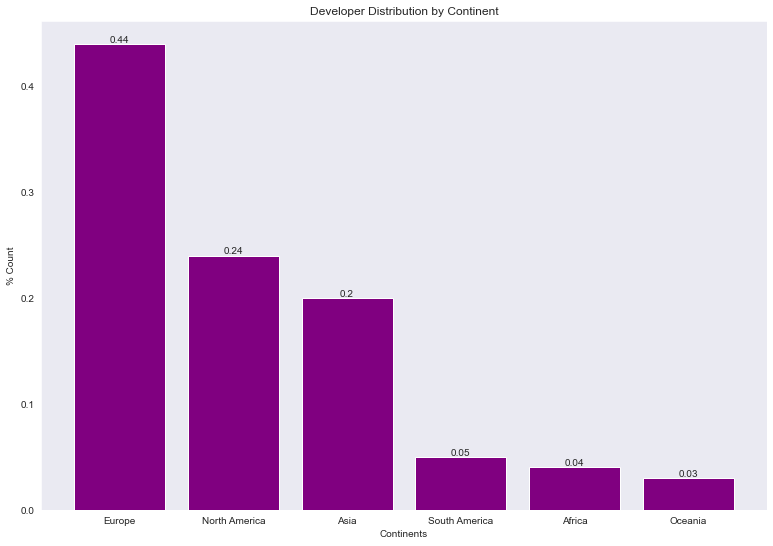

In [374]:
# calling method plot_continent_distribution from data visualizer class to plot Developer Distribution by Continent

data_visualizer.plot_continent_distribution()

### Observation 

Most of the data was gathered from developers in Europe, North America and Asia.

#### Years of Experience : Professionnal & Coding median distribution

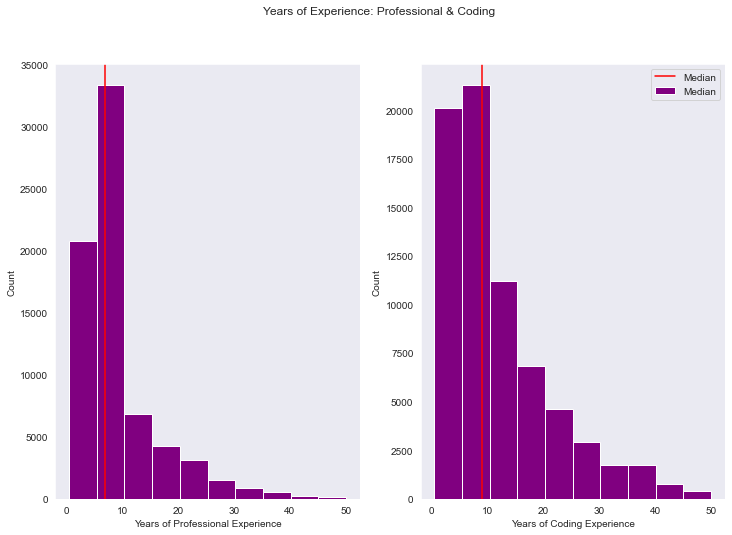

In [375]:
# calling method plot_experience_histogram from data visualizer class to plot Years of Experience and Proffessional Coding

data_visualizer.plot_experience_histogram()

### Observation 
From the plot above the median value for in our dataset in column years of professional experience is estimated to be 6 and for column years of coding experience is 9

#### Age and Gender Distribution

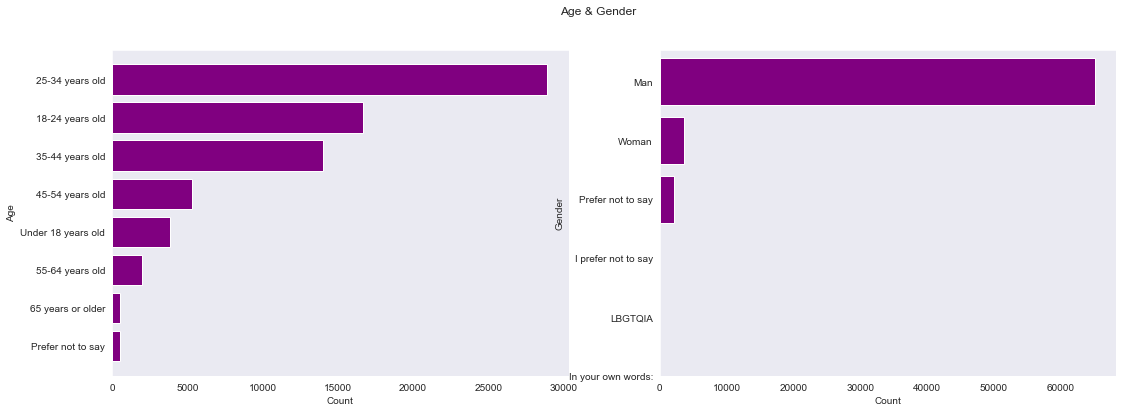

In [376]:
# calling method plot_age_gender_distribution from data visualizer class to plot Age and Gender 

data_visualizer.plot_age_gender_distribution()

### Observation 

From the plots above for gender we see **male** having the highest count and the general **ages** count are **25-34 years old** 

#### Source of Coding Skills

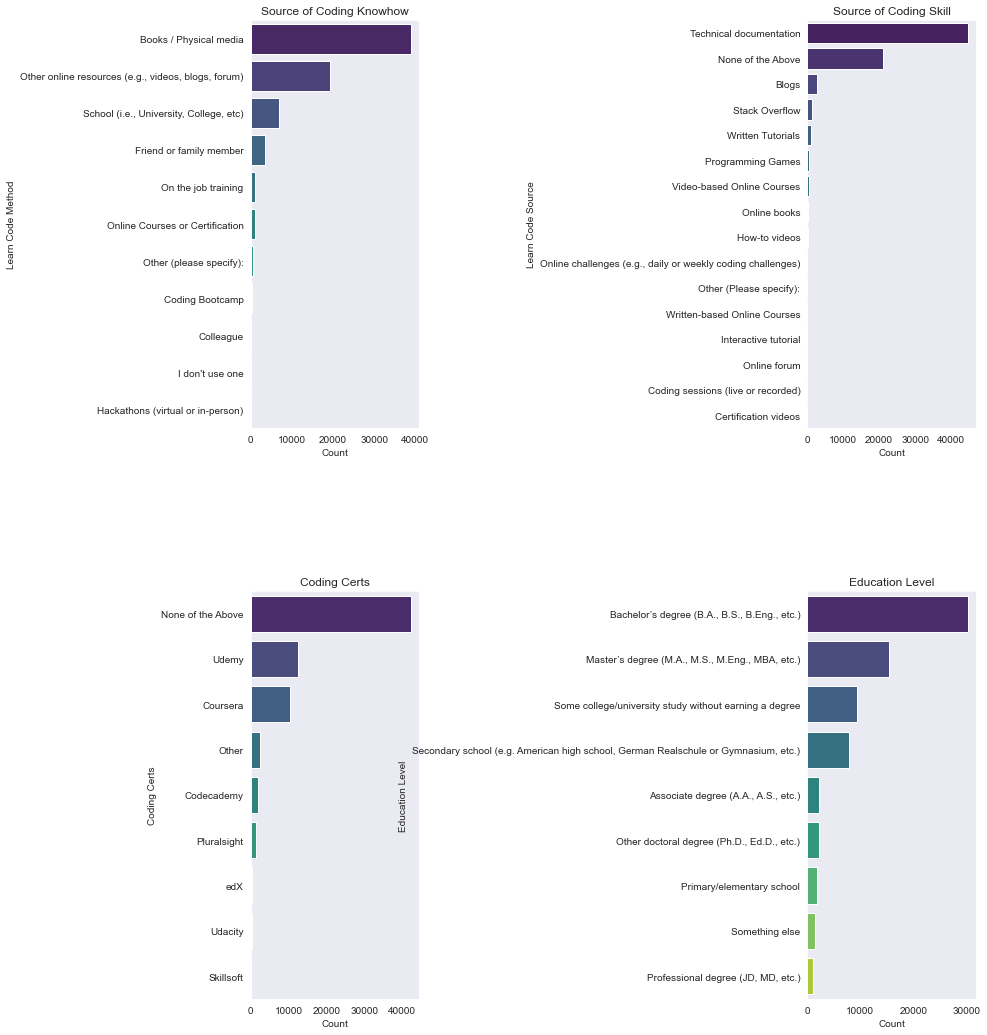

<Figure size 720x432 with 0 Axes>

In [377]:
# calling method plot_source_coding_skills from data visualizer class to plot coding certification

data_visualizer.plot_source_coding_skills()

#### Employment Status & Work Style


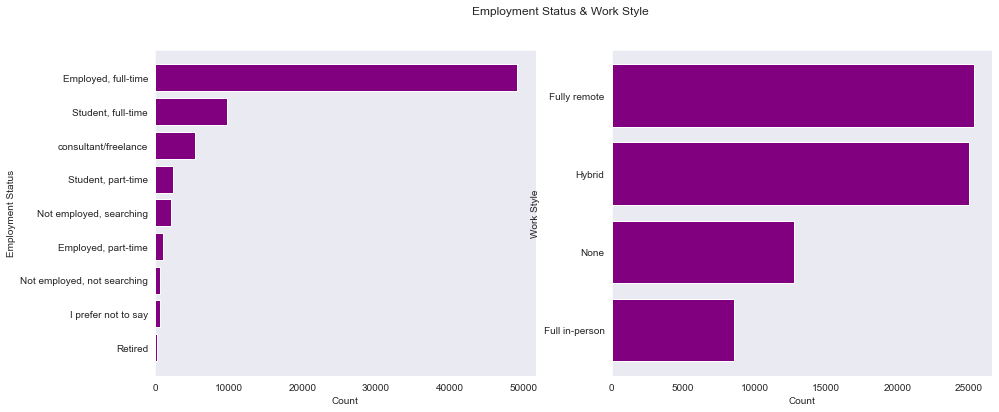

In [378]:
# calling method plot_employment_workstyle_distribution from data visualizer class to plot Employment status work style

data_visualizer.plot_employment_workstyle_distribution()

### Observation 
From the plots above for **employment status** we see **Employed, fulltime** having the highest count and the **Work style ** count are fully remote

## Annual Salary Visualisation 

In [379]:
#create a class for salary visualizer 

class SalaryVisualizer:
    def __init__(self, df):
        self.df = df
        
    def plot_salary_distribution(self):
        plt.figure(figsize=(13,9))
        plt.hist(self.df['Annual_Salary'], color='purple')
        plt.yscale('log')
        plt.ylabel('Count')
        plt.xlabel('Annual Salary in USD')
        plt.title('Annual Salary Distribution in USD')
        plt.show()
        
    def plot_median_salary_by_continent(self, salo):
        salo_sorted = salo.sort_values(ascending=True)
        plt.figure(figsize=(12, 8))
        salo_sorted.plot(kind='barh', color='purple')
        plt.ylabel('Continents')
        plt.xlabel('Median Annual Salary')
        plt.title('Median Annual Salary by Continents')
        plt.show()
        
    def plot_salary_boxplot_by_continent(self):
        plt.figure(figsize=(12, 8))
        ax = sns.boxplot(x='continents', y='Annual_Salary', data=self.df, color='purple')
        plt.xticks(rotation=45)
        plt.xlabel('Continent')
        plt.ylabel('Annual Developer Salary')
        plt.title('Annual Developer Salaries by Continent')
        plt.show()
        
    def developer_tools_by_salary(self):
        fig, axes = plt.subplots(nrows=4, figsize=(22, 30))
        columns_to_plot = ['LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith']
        for i, column in enumerate(columns_to_plot):
            median_salary_by_column = self.df.groupby(column)['Annual_Salary'].median().reset_index()
            median_salary_by_column = median_salary_by_column.sort_values('Annual_Salary', ascending=False)
            top_10_categories = median_salary_by_column.head(10)
            axes[i].bar(top_10_categories[column], top_10_categories['Annual_Salary'], color='purple')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Median Annual Salary')
            axes[i].set_title(f'Top 10 {column} by Median Annual Salary')
        plt.tight_layout()
        plt.show()
        
    def plot_average_salary_by_version_control(self):
        average_salary_by_version_control = self.df.groupby('VersionControlSystem')['Annual_Salary'].median().reset_index()
        average_salary_by_version_control = average_salary_by_version_control.sort_values('Annual_Salary', ascending=True)
        plt.figure(figsize=(8, 4))
        plt.barh(average_salary_by_version_control['VersionControlSystem'], average_salary_by_version_control['Annual_Salary'], color='purple')
        plt.ylabel('Version Control System')
        plt.xlabel('Average Annual Salary')
        plt.title('Version Control Systems by Average Annual Salary')
        plt.xticks(rotation=0, ha='right')
        plt.tight_layout()
        plt.show()
        
salary_visualizer = SalaryVisualizer(df)

#### Annual Salary Distribution

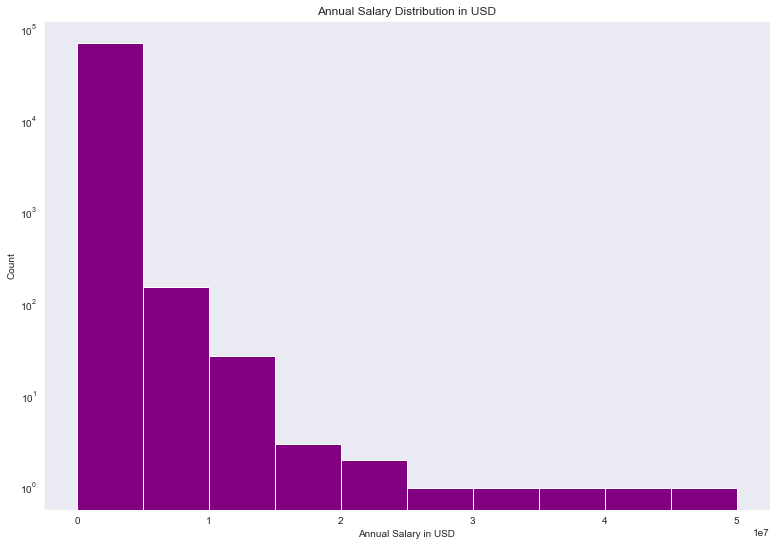

In [380]:
# calling method plot_salary_distribution from salary visualizer class to plot log Salary Distribution

salary_visualizer.plot_salary_distribution()

### Observation 

The highest value in the annual salary column is **0** we reference back to the analysis we did above for example an individual is employed and full time but they have have annual salary as **1dollar** which we converted to **0** adding to the students who are also full time and have no annual salary.

### Salary Distribution by Continent

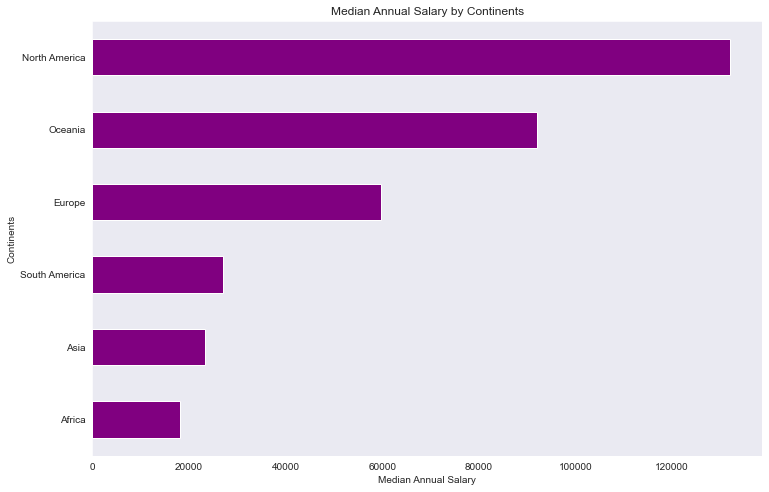

In [381]:
# calling method plot_salary_distribution from salary visualizer class to plot Salary Distribution with median 

salary_visualizer.plot_median_salary_by_continent(salo)

### Observation from median salary distribution from continents 
> North American developers have the highest median count, followed by Oceania and Europe

### Continent median salary distribution

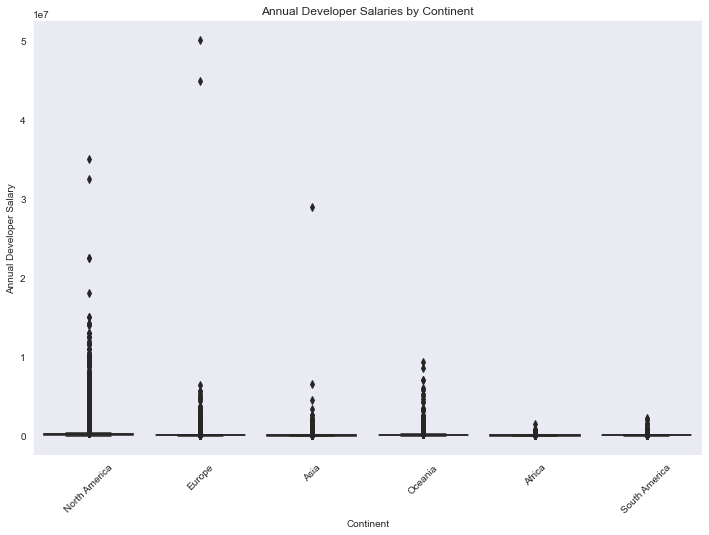

In [382]:
# calling method plot_salary_boxplot_by_continent from salary visualizer class to plot Salary continent with median 

salary_visualizer.plot_salary_boxplot_by_continent()

### Observation 

> From the plot above we can see that some data points are far to the top most this could be factored by; currency difference 
interms of continents and the role at work place and the level of education or even influence in an insitution 

### Developer Tools By median annual Salary

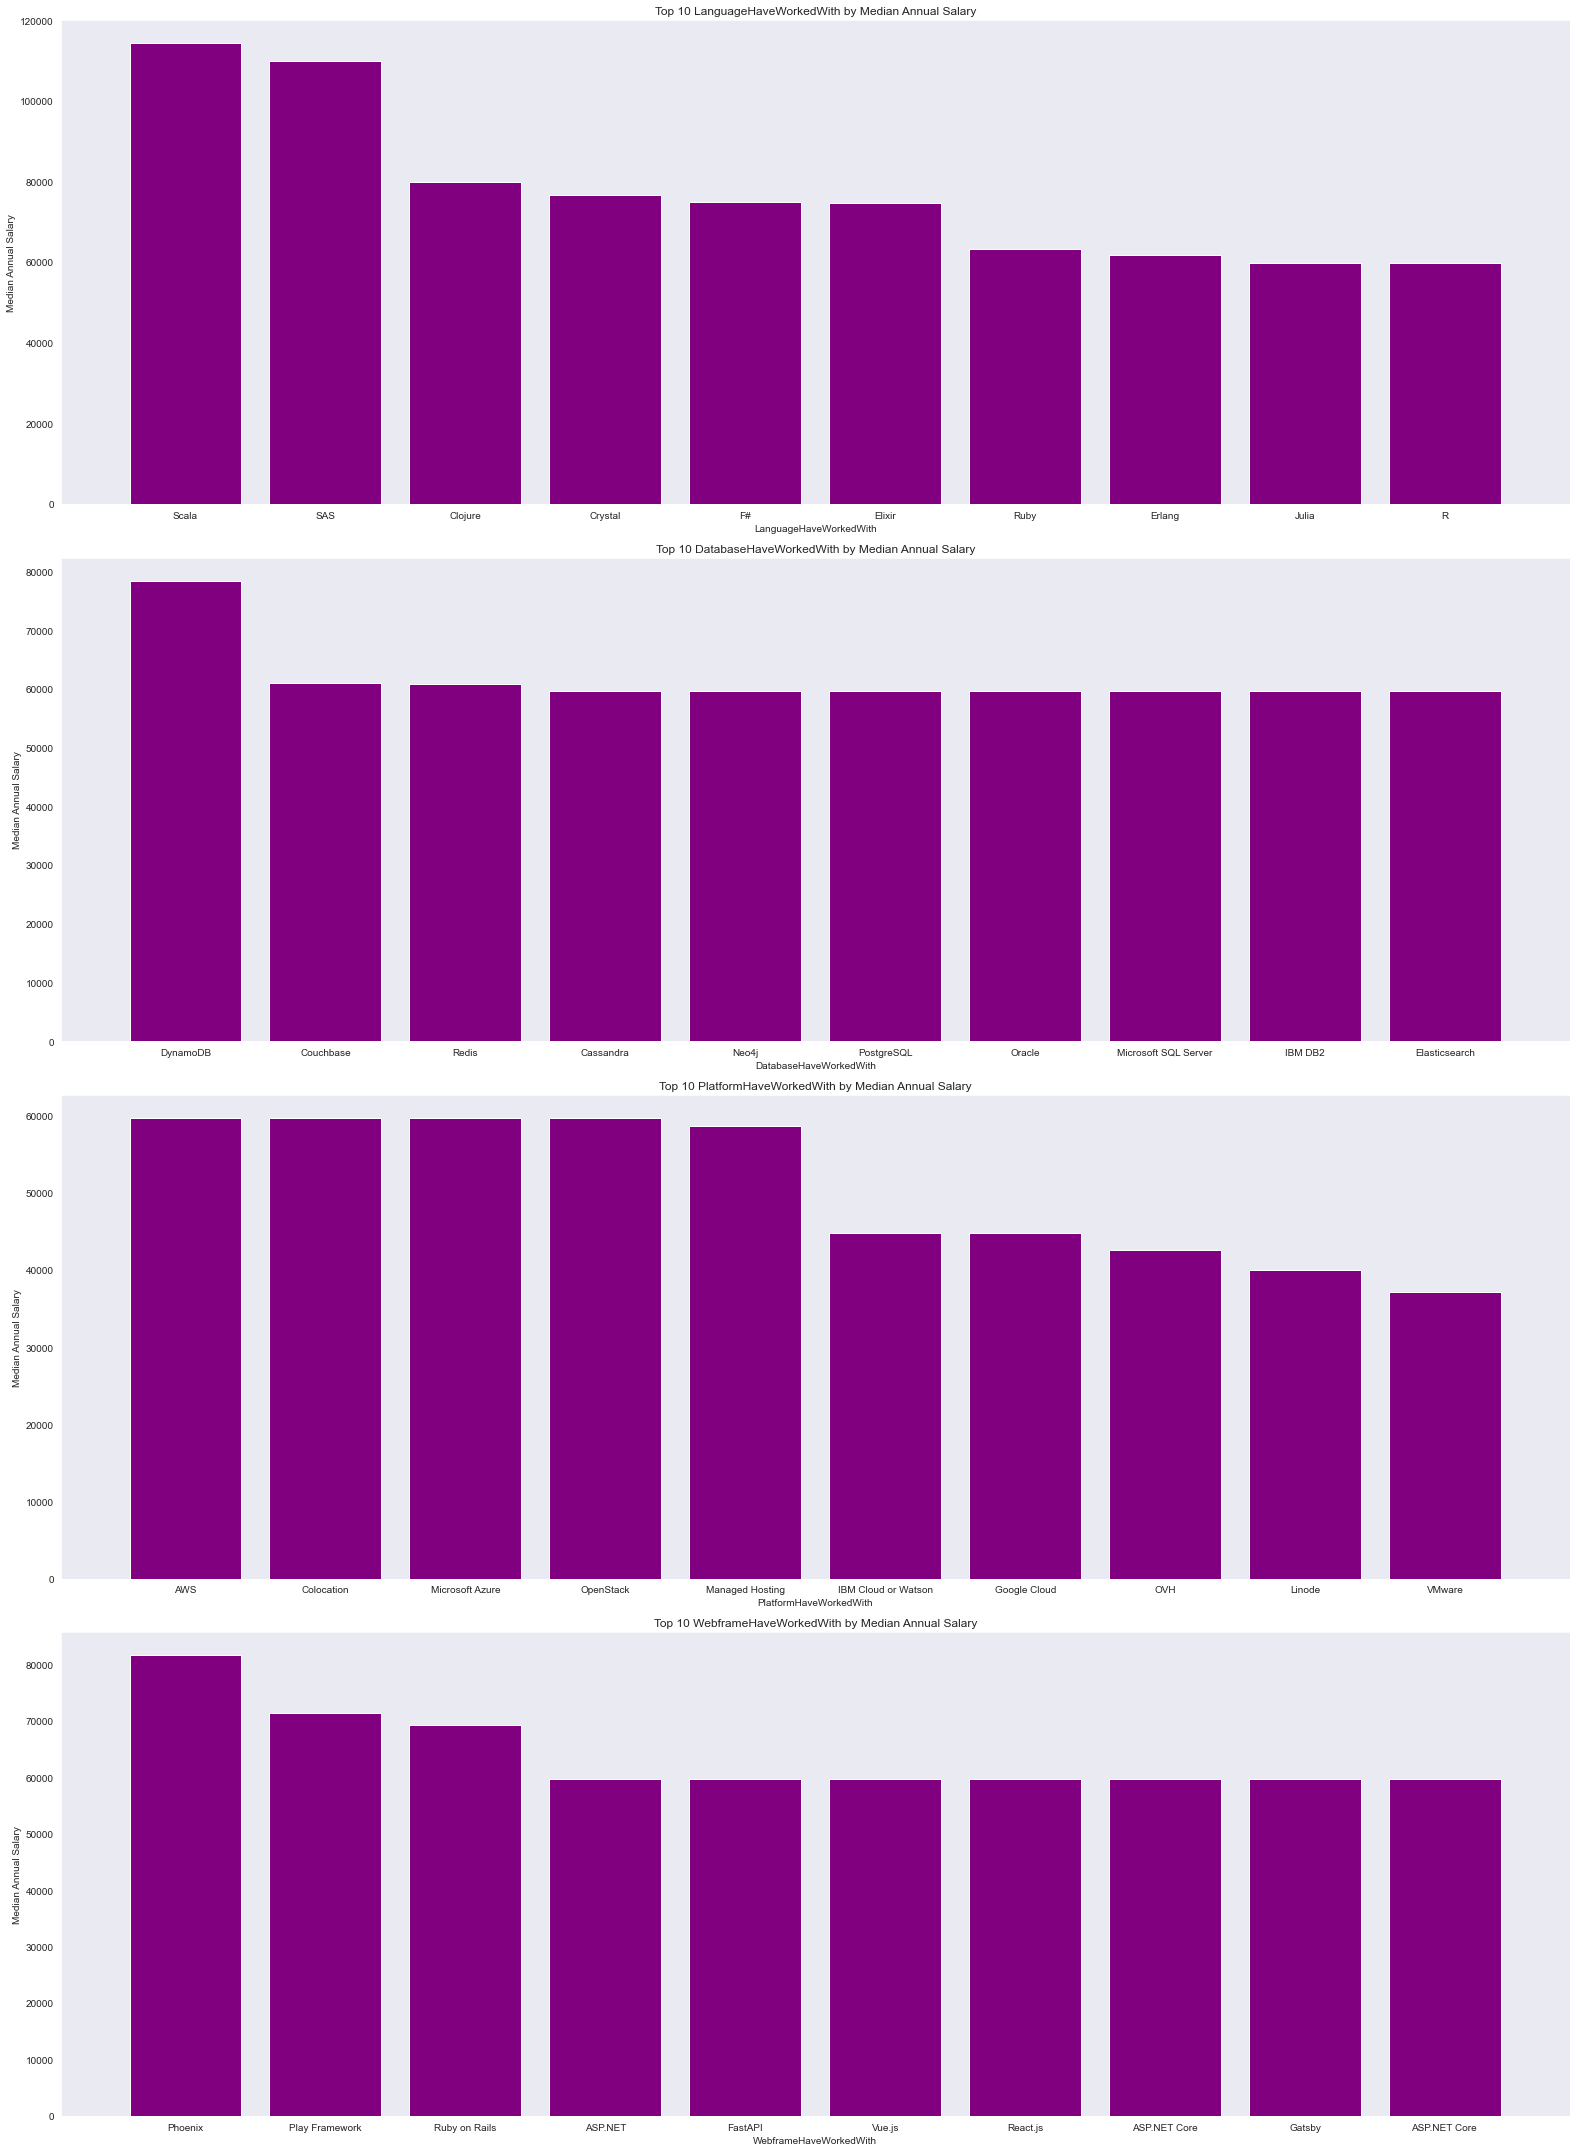

In [383]:
# calling method developer_tools_by_salary from salary visualizer class to plot median salary of languagehave worked with
#databasehaveworkedwith, webframeworkhaveworkedwith, programmehaveworkedwith

salary_visualizer.developer_tools_by_salary()

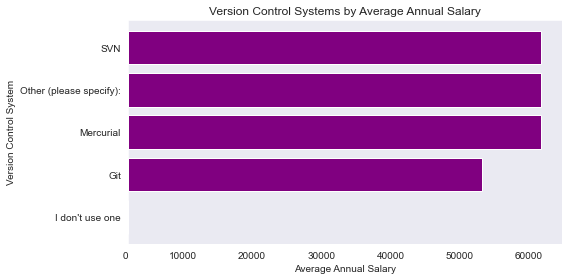

In [384]:
# calling method plot_average_salary_by_version_control from salary visualizer class to plot Salary versionCS median 

salary_visualizer.plot_average_salary_by_version_control()

## Multivariate Analysis

Below we look at the language, education level  and Annual Salry 

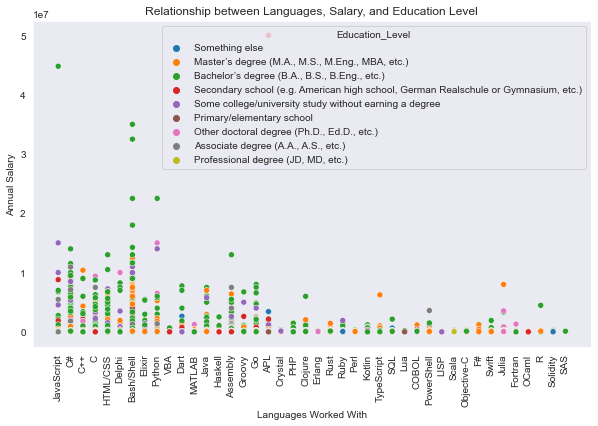

In [385]:
#create a multivariate analysis class 

class MultivariateAnalysis:
    def __init__(self, df):
        self.df = df
        
    def perform_multivariate_analysis(self):
        subset_df = self.df[["LanguageHaveWorkedWith", "Annual_Salary", "Education_Level"]]
        subset_df = subset_df.dropna(subset=["LanguageHaveWorkedWith", "Annual_Salary", "Education_Level"])
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=subset_df, x="LanguageHaveWorkedWith", y="Annual_Salary", hue="Education_Level")
        plt.xticks(rotation=90)
        plt.xlabel("Languages Worked With")
        plt.ylabel("Annual Salary")
        plt.title("Relationship between Languages, Salary, and Education Level")
        plt.show()
        
multivariate_analysis = MultivariateAnalysis(df)
multivariate_analysis.perform_multivariate_analysis()

# Data Preprocessing

### Feature Selection

Feature selection was done initially using **domain knowledge** to come up with a preliminary list of features that need to be further explored on. **Correlation** was then performed to identify features that are most correlated to the **target variable**, annual salary, and the final list of 10 features to be used in the model in the prediction of developer salaries was obtained.

In the initial selection, domain knowledge was used and a list of all columns dropped was created, 'deletedf', and another list of all selected features was named 'selectorf'

In [386]:
# A list of dropped columns in initial feature selection

deletedf = ['LanguageWantToWorkWith', 'DatabaseWantToWorkWith', 'PlatformWantToWorkWith', 'WebframeWantToWorkWith',
'MiscTechWantToWorkWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsWantToWorkWith', 'Proj_Mgmt_WantToWorkWith',
'Proj_Mgmt_SyncWantToWorkWith', 'Blockchain_Sentiment', 'New_Stack_Overfl_Sites', 'SOVisitFreq', 'SOAccount_Ownership',
'SOA_ParticipationFreq', 'Belong_SO_Comm', 'Participation_PDS', 'Contributor_or_Manager', 'Extroverted', 'Siloed_Teams',
'Information_Availability', 'Well_Resourced', 'Info_Answ_Resource', 'Recurring_Responses', 'Workflow_Interruptions',
'External_Team_Assistance', 'External_Team_Interaction', 'Knowledge_Silos', 'TimeSearching_Answers', 'TimeAnswering',
'Onboarding_Duration', 'ProfessionalTech', 'Is_Involved_Onboarding', 'Employer_Learning_Resources', 'Learning_Support',
'SurveyLength', 'SurveyEase', 'Purchase_Research', 'OpSysPersonal_use', 'VersionControlSystem', 'VCInteraction',
'Proj_Mgmt_HVWorkedWith', 'Proj_Mgmt_SyncHaveWorkedWith', 'Age', 'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Disability',
'MentalHealth', 'continents', 'Learn_Code_Method', 'Learn_Code_Source', 'DatabaseHaveWorkedWith', 'WebframeHaveWorkedWith',
'MiscTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith', 'OrgSize', 'Coding_Experience', 'Outofwork_Coding',
'PlatformHaveWorkedWith', 'OpSysProfessional_use', 'ToolsTechHaveWorkedWith']

# A list of selected features in initial feature selection

selectorf = ['Developer_Description', 'Employment_Status','Remote_vs_Onsite', 'Outofwork_Coding', 'Education_Level',
       'Learn_Code_Method', 'Learn_Code_Source', 'Code_Certifications','Coding_Experience', 'Pro_Experience', 'DevType', 'OrgSize',
       'PurchaseInfluence', 'Country','LanguageHaveWorkedWith','DatabaseHaveWorkedWith','PlatformHaveWorkedWith','WebframeHaveWorkedWith',
       'MiscTechHaveWorkedWith','ToolsTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith','OpSysProfessional_use', 'OpSysPersonal_use', 
       'VersionControlSystem','VCInteraction', 'Proj_Mgmt_HVWorkedWith','Proj_Mgmt_SyncHaveWorkedWith','Age','Gender', 'Trans', 'Sexuality', 
       'Ethnicity', 'Disability','MentalHealth', 'Annual_Salary', 'continents']

# Printing the length of these features:

print(len(deletedf), len(selectorf))

62 36


### Encoding Features

Encoding was performed using two types of encoders:

* Binary encoding. This was done on features that had categories with no inherent order in them. Binary encoding was chosen over   One-hot encoding in order to reduce the number of columns added after encoding.
* Ordinal encoding. This was performed on the features that have inherent order in them. They were sorted in descending order     and ordinal encoding performed on them.
* Label encoding. This was performed on the target variable 'annual salary

In order to find the correlation between initially sected features and target variable(Annual Salary)  

In [387]:
# A list of features to be binary encoded.

columns_to_binary_encode = ['Employment_Status', 'ProfessionalTech', 'OpSysPersonal_use', 'OpSysProfessional_use',
                            'Remote_vs_Onsite','Developer_Description', 'Outofwork_Coding', 'Learn_Code_Method',
                            'Learn_Code_Source', 'Code_Certifications', 'DevType', 'Purchase_Research', 'Country',
                            'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'LanguageWantToWorkWith',
                            'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
                            'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
                            'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
                            'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'VersionControlSystem',
                            'VCInteraction', 'Proj_Mgmt_HVWorkedWith', 'Proj_Mgmt_WantToWorkWith',
                            'Proj_Mgmt_SyncHaveWorkedWith', 'Proj_Mgmt_SyncWantToWorkWith', 'New_Stack_Overfl_Sites',
                            'SOAccount_Ownership', 'Belong_SO_Comm', 'Gender', 'Trans', 'Sexuality', 'Ethnicity',
                            'Disability', 'MentalHealth', 'Participation_PDS', 'Contributor_or_Manager',
                            'Is_Involved_Onboarding', 'Employer_Learning_Resources', 'Learning_Support', 'continents' ]

# A list of columns to be ordinal encoded

columns_to_ordinal_encode = ['Education_Level', 'OrgSize', 'PurchaseInfluence', 'Blockchain_Sentiment', 'SOVisitFreq',
                             'SOA_ParticipationFreq', 'Age', 'Extroverted', 'Siloed_Teams', 'Information_Availability',
                             'Well_Resourced', 'Info_Answ_Resource', 'Recurring_Responses', 'Workflow_Interruptions',
                             'External_Team_Assistance', 'External_Team_Interaction', 'Knowledge_Silos',
                             'TimeSearching_Answers', 'TimeAnswering', 'Onboarding_Duration', 'SurveyLength', 'SurveyEase']

# A list of numerical columns

numeric_cols = ['Coding_Experience', 'Pro_Experience','Annual_Salary']

Checking that columns to binary encode and ordinal encode add up to all columns to be encoded 

In [388]:
#create sets

columns_to_binary_encode_set = set(columns_to_binary_encode)
columns_to_ordinal_encode_set = set(columns_to_ordinal_encode)
deletedf_set = set(deletedf)

#get the difference of the list columns

final_to_binary_encode = list(columns_to_binary_encode_set - deletedf_set)
final_to_ordinal_encode = list(columns_to_ordinal_encode_set - deletedf_set)

#what is their size

print(len(final_to_binary_encode))
print(len(final_to_ordinal_encode))
print(len(selectorf))

7
2
36


From inspection, work experience is the same as proffessional experience and it was therefore dropped.

ResponseID was also dropped as it is unnecessary in the modelling process


In [389]:
# droping work experience as its correlated to professional experience, hence duplication

co_to_drop = ['WorkExp', 'ResponseId']
df = processor.drop_columns(co_to_drop)

Defining a class Data encoder that is used to encode the features

In [390]:
#create a class for dataencoding
class DataEncoder:
    def __init__(self, df):
        self.df = df

    def perform_binary_encoding(self, columns):
        # Creating a copy of the original DataFrame
        df_encoded = self.df.copy()
        
        # Perform Binary Encoding for each specified column
        for column in columns:
            binary_encoder = ce.BinaryEncoder(cols=[column])
            df_encoded = binary_encoder.fit_transform(df_encoded)
        
        return df_encoded

    def perform_ordinal_encoding(self, columns):
        # Creating a copy of the original DataFrame
        df_encoded = self.df.copy()
        
        # Performing Ordinal Encoding for each specified column
        for column in columns:
            ordinal_encoder = ce.OrdinalEncoder(cols=[column])
            df_encoded[column] = ordinal_encoder.fit_transform(df_encoded[column])
        
        return df_encoded

### Binary encoding

We will binary encode to find the correlation 

In [391]:
# Initializing DataEncoder

data_encoder = DataEncoder(df)

# Performing binary encoding

df_encoded_binary = data_encoder.perform_binary_encoding(final_to_binary_encode)

# Displaying the encoded dataframe

df_encoded_binary.head(2)

,Developer_Description_0,Developer_Description_1,Developer_Description_2,Employment_Status_0,Employment_Status_1,Employment_Status_2,Employment_Status_3,Remote_vs_Onsite_0,Remote_vs_Onsite_1,Remote_vs_Onsite_2,...,TimeAnswering,Onboarding_Duration,ProfessionalTech,Is_Involved_Onboarding,Employer_Learning_Resources,Learning_Support,SurveyLength,SurveyEase,Annual_Salary,continents
1,0,0,1,0,0,0,1,0,0,1,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Too long,Difficult,132000.0,North America
2,0,1,0,0,0,0,1,0,1,0,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Neither easy nor difficult,40205.0,Europe


### Ordinal encoding

We will ordinal encode to find the correlation

In [392]:
# Performing Ordinal Encoding
data_encoder = DataEncoder(df_encoded_binary)

df_encod = data_encoder.perform_ordinal_encoding(final_to_ordinal_encode)

# Displaying the encoded dataframe

df_encod.head(2)


,Developer_Description,Employment_Status,Remote_vs_Onsite,Outofwork_Coding,Education_Level,Learn_Code_Method,Learn_Code_Source,Code_Certifications,Coding_Experience,Pro_Experience,...,TimeAnswering,Onboarding_Duration,ProfessionalTech,Is_Involved_Onboarding,Employer_Learning_Resources,Learning_Support,SurveyLength,SurveyEase,Annual_Salary,continents
1,I am a developer by profession,"Employed, full-time",Fully remote,Hobby,1,I don't use one,None of the Above,None of the Above,9.0,7.0,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Too long,Difficult,132000.0,North America
2,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,2,Books / Physical media,Technical documentation,None of the Above,14.0,5.0,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Neither easy nor difficult,40205.0,Europe


Dropping all the deleted columns 

Confirming all columns have been encoded

In [393]:
# dropping deleted columns

df_encod = processor.drop_columns(deletedf)

# confirm no categorical variables

print(df_encod.select_dtypes(include='object').columns)

df_encod.head()

Index(['Developer_Description', 'Employment_Status', 'Remote_vs_Onsite',
       'Education_Level', 'Code_Certifications', 'DevType',
       'PurchaseInfluence', 'Country', 'LanguageHaveWorkedWith'],
      dtype='object')


,Developer_Description,Employment_Status,Remote_vs_Onsite,Education_Level,Code_Certifications,Pro_Experience,DevType,PurchaseInfluence,Country,LanguageHaveWorkedWith,Annual_Salary
1,I am a developer by profession,"Employed, full-time",Fully remote,Something else,None of the Above,7.0,None of the Above,None of the Above,Canada,JavaScript,132000.0
2,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",None of the Above,5.0,Data scientist or machine learning specialist,I have some influence,United Kingdom of Great Britain and Northern I...,C#,40205.0
3,I am a developer by profession,"Employed, full-time",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",None of the Above,17.0,"Developer, full-stack",I have some influence,Israel,C#,215232.0
4,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",None of the Above,3.0,"Developer, front-end",I have some influence,United States of America,C#,132000.0
5,"I am not primarily a developer, but I write co...","Student, full-time",None of the Above,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",None of the Above,7.0,None of the Above,None of the Above,Germany,C++,0.0


### Correlation 
Looking at the correlation between the initially selected features to the target variable Annual Salary


In [394]:
#corr df to see the relations of annual salary and selected features
corr = pd.DataFrame(abs(df_encod.corr()['Annual_Salary']).sort_values(ascending=False))
corr

,Annual_Salary
Annual_Salary,1.000000
Pro_Experience,0.056295


After reviewing the correlation of the variables, we narrowed down on the variables below by looking at the top correlations to `Annual_Salary`. We also used domain knowledge to include some columns like `Education_Level` and `Code_Certifications`.

In [395]:
#Selected final list of features
finalf = ['Code_Certifications', 'Education_Level', 'Employment_Status', 'PurchaseInfluence', 'Country', 'Pro_Experience',
'Remote_vs_Onsite', 'DevType', 'LanguageHaveWorkedWith', 'Developer_Description', 'Annual_Salary' ]

#this is the binary list
finalbi = ['Code_Certifications', 'Employment_Status', 'Country', 'Remote_vs_Onsite', 'DevType', 'LanguageHaveWorkedWith',
           'Developer_Description']
#this is our ordinal final list
finalord = ['PurchaseInfluence', 'Education_Level']
#this is our numerical feature from the begining 
finalnum = ['Pro_Experience']

In [396]:
#we select the columns finalf from official df
data_anto = df[finalf]

### Final List of Selected Features

In [397]:
#preview final dataframe info
data_anto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71711 entries, 1 to 73267
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code_Certifications     71711 non-null  object 
 1   Education_Level         71711 non-null  object 
 2   Employment_Status       71711 non-null  object 
 3   PurchaseInfluence       71711 non-null  object 
 4   Country                 71711 non-null  object 
 5   Pro_Experience          71711 non-null  float64
 6   Remote_vs_Onsite        71711 non-null  object 
 7   DevType                 71711 non-null  object 
 8   LanguageHaveWorkedWith  71711 non-null  object 
 9   Developer_Description   71711 non-null  object 
 10  Annual_Salary           71711 non-null  float64
dtypes: float64(2), object(9)
memory usage: 9.1+ MB


### Mapping Ordinal Categories

In [398]:
# Function to map categories:

def map_dictionary_to_column(dictionary, df, column):
    df[column] = df[column].map(dictionary)
    return df

# Dictionaries

PI = {'None of the Above': 0, 'I have little or no influence': 1, 'I have some influence': 2, 'I have a great deal of influence': 3}

EL = {'Something else': 0, 'Primary/elementary school': 1, 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 2,
      'Some college/university study without earning a degree': 3, 'Associate degree (A.A., A.S., etc.)':4, 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)':5,
      'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)':6, 'Professional degree (JD, MD, etc.)':7, 'Other doctoral degree (Ph.D., Ed.D., etc.)':8}

ES = {'Employed, full-time':8,'Student, full-time': 1, 'Independent contractor, freelancer, or self-employed': 6,'Student, part-time': 2,'Not employed, but looking for work':5,
      'Employed, part-time':7,'Not employed, and not looking for work':3,'I prefer not to say':4, 'Retired':0}

CC = {'None of the Above': 0, 'Udemy': 1, 'Coursera': 2, 'Other': 3, 'Codecademy':4, 'Pluralsight':5,
      'edX':6, 'Udacity':7, 'Skillsoft':8}

country_code = {'Canada': 0, 'United Kingdom of Great Britain and Northern Ireland': 1,
               'Israel': 2, 'United States of America': 3, 'Germany': 4, 'India': 5,
               'Netherlands': 6, 'Croatia': 7, 'Australia': 8, 'Russian Federation': 9,
               'Czech Republic': 10, 'Austria': 11, 'Serbia': 12, 'Italy': 13, 'Ireland': 14,
               'Poland': 15, 'Slovenia': 16, 'Iraq': 17, 'Sweden': 18, 'Madagascar': 19, 'Norway': 20,
               'Taiwan': 21, 'Hong Kong (S.A.R.)': 22, 'Mexico': 23, 'France': 24, 'Brazil': 25,
               'Lithuania': 26, 'Uruguay': 27, 'Denmark': 28, 'Spain': 29, 'Turkey': 30,
               'South Africa': 31, 'Ukraine': 32, 'Finland': 33, 'Romania': 34, 'Portugal': 35,
               'Singapore': 36, 'Oman': 37, 'Belgium': 38, 'Chile': 39, 'Bulgaria': 40, 'Latvia': 41,
               'Philippines': 42, 'Greece': 43, 'Belarus': 44, 'Saudi Arabia': 45, 'Kenya': 46,
               'Switzerland': 47, 'Iceland': 48, 'Viet Nam': 49, 'Thailand': 50, 'China': 51,
               'Montenegro': 52, 'Slovakia': 53, 'Japan': 54, 'Luxembourg': 55, 'Argentina': 56,
               'Hungary': 57, 'Tunisia': 58, 'Bangladesh': 59, 'Maldives': 60,
               'Dominican Republic': 61, 'Egypt': 62, 'Jordan': 63, 'Pakistan': 64, 'Nepal': 65,
               'Iran, Islamic Republic of...': 66, 'Indonesia': 67, 'Ecuador': 68,
               'Bosnia and Herzegovina': 69, 'Armenia': 70, 'Colombia': 71, 'Kazakhstan': 72,
               'South Korea': 73, 'Costa Rica': 74, 'Honduras': 75, 'Mauritius': 76, 'Estonia': 77,
               'Algeria': 78, 'Trinidad and Tobago': 79, 'Mali': 80, 'Morocco': 81, 'Swaziland': 82,
               'New Zealand': 83, 'The former Yugoslav Republic of Macedonia': 84,
               'Afghanistan': 85, 'Cyprus': 86, 'United Arab Emirates': 87, 'Peru': 88,
               'Uzbekistan': 89, 'Ethiopia': 90, 'Bahrain': 91, 'Malta': 92, 'Nicaragua': 93,
               'Andorra': 94, 'Republic of Korea': 95, 'Lebanon': 96, 'Belize': 97, 'Zambia': 98,
               'Bolivia': 99, 'Malaysia': 100, 'Sri Lanka': 101,
               "Lao People's Democratic Republic": 102, 'Guatemala': 103, 'Azerbaijan': 104,
               'Suriname': 105, 'El Salvador': 106, 'Syrian Arab Republic': 107, 'Qatar': 108,
               'Nigeria': 109, 'Kyrgyzstan': 110, 'Zimbabwe': 111, 'Rwanda': 112, 'Georgia': 113,
               'Cambodia': 114, 'Malawi': 115, 'Yemen': 116, 'Fiji': 117, 'Nomadic': 118, 'Uganda': 119,
               'Albania': 120, 'Timor-Leste': 121, 'Mongolia': 122, 'Republic of Moldova': 123,
               'Tajikistan': 124, 'Ghana': 125, 'United Republic of Tanzania': 126, 'Myanmar': 127,
               'Kuwait': 128, 'Cameroon': 129, 'Kosovo': 130, 'Jamaica': 131, 'Turkmenistan': 132, 'Benin': 133,
               'Botswana': 134, 'Niger': 135, 'Palestine': 136, 'Cape Verde': 137,
               'Libyan Arab Jamahiriya': 138, 'Venezuela, Bolivarian Republic of...': 139,
               'Senegal': 140, 'Cuba': 141, 'Togo': 142, 'Angola': 143, 'Isle of Man': 144, 'Panama': 145,
               'Bahamas': 146, 'Paraguay': 147, 'Sudan': 148, 'Liberia': 149, 'Bhutan': 150,
               'Democratic Republic of the Congo': 151, "Côte d'Ivoire": 152, 'Barbados': 153,
               'Congo, Republic of the...': 154, 'Namibia': 155, 'Somalia': 156, 'Sierra Leone': 157,
               'Mozambique': 158, 'Lesotho': 159, 'Chad': 160, 'North Korea': 161,
               'Antigua and Barbuda': 162, 'Papua New Guinea': 163, 'Palau': 164, 'Guinea': 165,
               'Haiti': 166, 'Gabon': 167, 'Mauritania': 168, 'San Marino': 169, 'Guyana': 170,
               'Saint Lucia': 171, 'Burkina Faso': 172, 'Brunei Darussalam': 173, 'Gambia': 174,
               'Monaco': 175, 'Djibouti': 176, 'Seychelles': 177, 'Solomon Islands': 178,
               'Saint Kitts and Nevis': 179}

RO = {'Fully remote': 0, 'Hybrid (some remote, some in-person)': 1, 'None of the Above': 2, 'Full in-person': 3}

DV = {'Developer, full-stack':16, 'Developer, front-end':15
,'Developer, back-end':14,'None of the Above':0,'Data scientist or machine learning specialist':27,'Engineer, data':26,'Developer, mobile':17,
'Developer, desktop or enterprise applications':18,'Student':2,'Other (please specify):':1,'Engineer, site reliability':20,
'Engineering manager':25,'Developer, embedded applications or devices':19,
'Academic researcher':3,'DevOps specialist':12,
'Developer, QA or test':28,'Educator':6,'Senior Executive (C-Suite, VP, etc.)':29,'Data or business analyst':21,'Project manager':11,
'Developer, game or graphics':22,'System administrator':10,'Cloud infrastructure engineer':23,'Database administrator':7,'Product manager':9,
'Security professional':24,'Scientist':13,'Designer':5,'Marketing or sales professional':4,'Blockchain':8}

programming_lang = {'JavaScript':42, 'HTML/CSS':41, 'SQL':40, 'Python':39, "TypeScript":38, 'Java':37, "Bash/Shell":36, "C#":35,
                   'C++':34, "PHP":33, "C":32, "PowerShell":31, "Go":30, "Rust":29, "Kotlin":28, "Dart":27, "Ruby":26, "Assembly":25,
                   "Swift":24, "R":23, "VBA":22, "MATLAB":21, "Lua":20, "Groovy":19, "Delphi":18, "Scala":17, "Objective-C":16,
                   "Perl":15, "Haskell":14, "Elixir":13, "Julia":12, "Clojure":11, 'Solidity':10, "LISP":9, 'F#':8, 'Fortran':7,
                   "Erlang":6, "APL":5, "COBOL":4, "SAS":3, "OCaml":2, "Crystal":1}

dev_desc = {'I am a developer by profession': 0, 'I am learning to code': 1, 'I am not primarily a developer, but I write code sometimes as part of my work': 2,
        'I code primarily as a hobby': 3, 'I used to be a developer by profession, but no longer am':4}

In [399]:
# Mapping Purchace Influence
data_anto = map_dictionary_to_column(PI, data_anto, 'PurchaseInfluence')

# Mapping Education Level
data_anto = map_dictionary_to_column(EL, data_anto, 'Education_Level')

# Mapping Employment status
data_anto = map_dictionary_to_column(ES, data_anto, 'Employment_Status')

# Mapping Code certifications
data_anto = map_dictionary_to_column(CC, data_anto, 'Code_Certifications')

# Mapping Countries
data_anto = map_dictionary_to_column(country_code, data_anto, 'Country')

# Mapping Remote_vs_onsite
data_anto = map_dictionary_to_column(RO, data_anto, 'Remote_vs_Onsite')

# Mapping DevType
data_anto = map_dictionary_to_column(DV, data_anto, 'DevType')

# Mapping LanguageHaveWorkedWith
data_anto = map_dictionary_to_column(programming_lang, data_anto, 'LanguageHaveWorkedWith')

#Mapping Developer_Description
data_anto = map_dictionary_to_column(dev_desc, data_anto, 'Developer_Description')

In [400]:
#preview mapped dataframe
data_anto.head(3)

,Code_Certifications,Education_Level,Employment_Status,PurchaseInfluence,Country,Pro_Experience,Remote_vs_Onsite,DevType,LanguageHaveWorkedWith,Developer_Description,Annual_Salary
1,0,0,8,0,0,7.0,0,0,42,0,132000.0
2,0,6,8,2,1,5.0,1,27,35,2,40205.0
3,0,5,8,2,2,17.0,0,16,35,0,215232.0


In [401]:
#preview again to confirm no info has been lost
data_anto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71711 entries, 1 to 73267
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code_Certifications     71711 non-null  int64  
 1   Education_Level         71711 non-null  int64  
 2   Employment_Status       71711 non-null  int64  
 3   PurchaseInfluence       71711 non-null  int64  
 4   Country                 71711 non-null  int64  
 5   Pro_Experience          71711 non-null  float64
 6   Remote_vs_Onsite        71711 non-null  int64  
 7   DevType                 71711 non-null  int64  
 8   LanguageHaveWorkedWith  71711 non-null  int64  
 9   Developer_Description   71711 non-null  int64  
 10  Annual_Salary           71711 non-null  float64
dtypes: float64(2), int64(9)
memory usage: 9.1 MB


# Modelling 

Our objective is to be able to make developer salary predictions based on chosen features from our dataset. 
This task is to be achieved by evalating different algorithmns and checking to see whether they meet our evaluation metrics.

Initially we were to fit a Regression model but we were getting poor results in the test data. Lets go ahead and fit 2 regression models to check on this:

We will be evaluating the following Regression algorithmns :

* Multiple Linear Regression

* Decision Tree Regressor


In [402]:
# split the data to train & test

X = data_anto.drop('Annual_Salary', axis=1)
y = data_anto['Annual_Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Multiple Linear Regression

Regression models describe the relationship between variables by fitting a line to the observed data. Regression allows you to estimate how a dependent variable changes as the independent variables change. Multiple linear regression models allow us to add an indefinate number of variables

In [403]:
class DataPipeline:
    def __init__(self):
        self.pipeline = None

    def fit(self, X_train, y_train):
        self.pipeline.fit(X_train, y_train)

    def predict(self, X_test):
        return self.pipeline.predict(X_test)

    def create_pipeline(self):
        self.pipeline = Pipeline([('lr', LinearRegression())])

#Instantiate class 

data_pipe = DataPipeline()

#call the method

data_pipe.create_pipeline()

#fit train data

data_pipe.fit(X_train, y_train)

#predict on test data

y_pred_1 = data_pipe.predict(X_test)

In [404]:
# function to print model metrics

def print_metrics(labels, preds):
    
    #Calculating root mean squared Error
    RMSE = round(mean_squared_error(labels, preds, squared = False ), 2)
    print(f"The model has a {RMSE} chance of making an error \n")
    
    #calculate coefficient_of determination(r_squared)
    R_squared = round(r2_score(labels, preds), 2)
    print(f"The proportion of variance explained by our model is {R_squared}")

print_metrics(y_test,y_pred_1)

The model has a 550028.84 chance of making an error 

The proportion of variance explained by our model is 0.02


### Decision Tree Regressor
This is a non-parametric supervised learning method used for regression, the goal is to create a model that predicts the value of a target variable by learning simple decison rules inferred from the data features

In [405]:
class DataPipeline:
    def __init__(self):
        self.pipeline = None

    def fit(self, X_train, y_train):
        self.pipeline.fit(X_train, y_train)

    def predict(self, X_test):
        return self.pipeline.predict(X_test)

    def create_pipeline_1(self):
        self.pipeline = Pipeline([('lr', LinearRegression())])

    def create_pipeline_2(self):
        self.pipeline = Pipeline([('mms', MinMaxScaler()),
                                  ('tree', DecisionTreeRegressor(random_state=42))])


#Instatiate class

data_pipe = DataPipeline()

#call the class method

data_pipe.create_pipeline_2()

#fit on training data

data_pipe.fit(X_train, y_train)

#predict on test data

y_pred_2 = data_pipe.predict(X_test)

### Model Evaluation

In [406]:
print_metrics(y_test, y_pred_2)

The model has a 763911.18 chance of making an error 

The proportion of variance explained by our model is -0.9


For an ordinary least-squares regression model, R-squared can take a value between 0 and 1 where values closer to 0 represent a poor fit and values close to 1 represent an (almost) perfect fit.

An R-squared of 0 would mean that we are explaining 0% of the variation in the target variable. This is especially likely to occur if your dataset is not actually suited to a linear regression model.

A negative R-squared would mean that your model is worse at explaining the variance than the baseline model. A negative R-squared with ordinary least squares linear regression means that something is wrong with the code, because a linear regression with an independent variable is built on top of an intercept-only model

Note : if you are doing a predictive modelling, you are most interested in making predictions about unknown values of the target variable, therefore a high R-squared is important

Either way, R-squared provides important context for how you communicate about your model to others. If your model is only explaining a tiny amount of the variation in the target variable , then there are potentially-important contributing factors that aren't included in your analysis.

### Change From Regression to Classification Problem

The target variable seems to not be **fitting well on the predictive algorithms** therefore we will change the problem statement **to a classifcation problem**: 

_ We do this by determing an ordinal range of salaries salaries within the industry this would allow developers know the range of money to earn dependng on certain variables, 

_ It will also address skills gap within a certain salary categories while also helping HR in decision making. 

For classification, we will try the models below:
- Logistic Regression
- K-Nearest Neighbors
- Decision Trees Classiffier 
- Random Forest classifier
- XGBoost 

Let's first start by creating salary ranges from our target variable










In [407]:
#create salarycategorizer class  
class SalaryCategorizer:
    def __init__(self):
        self.data = None
        self.bins = [0, 5000, 15000, 25000, 50000, 100000, 200000, float('inf')]
        self.labels = ['On average $5,000', '$5,000 - $15,000', '$15,000 - $30,000',
                       '$30,000 - $50,000', '$50,000 - $100,000', '$100,000 - $200,000',
                       'Over $200,000']

    def categorize_salary(self, data):
        self.data = data
        self.data.loc[:, 'year_salary'] = pd.cut(
            self.data['Annual_Salary'], bins=self.bins, labels=self.labels, right=False
        )
        return self.data.year_salary.value_counts()
    
categorizer = SalaryCategorizer()
value_counts = categorizer.categorize_salary(data_anto)

value_counts

$50,000 - $100,000     19707
On average $5,000      15969
$100,000 - $200,000    11818
$15,000 - $30,000       9174
$30,000 - $50,000       8182
Over $200,000           4077
$5,000 - $15,000        2784
Name: year_salary, dtype: int64

In [408]:
# function to drop target column

def dropping_columns(data, column):

    return data.drop(columns=column)

#drop annual salary
ordinal_df = dropping_columns(data_anto, 'Annual_Salary')

From the new target categories above, we realised there was a class imbalance on some of the salary ranges. Below we correct for this using SMOTE

In [409]:
# address the class imbalance in the new salaries col

X1, y1 = dropping_columns(ordinal_df, 'year_salary'), ordinal_df['year_salary']
imb = SMOTE(random_state=1)
X1res, y1res = imb.fit_resample(X1, y1)

# label encode y1res

le = LabelEncoder()
y1res_en = le.fit_transform(y1res)

In [410]:
#trainsplit data

X1res_train, X1res_test, y1res_train, y1res_test = train_test_split(X1res, y1res_en, test_size = 0.3, random_state = 1)


### Logistic Regression

**Logistic regression** from **scikit-learn** is a supervised learning algorithm which in this project has been used for multiclass classification of salaries. It predicts the probability of each class using a logistic function and selects the class with the highest probability.

In [411]:
class DataPipeline:
    def __init__(self):
        self.pipeline = None

    def fit(self, X_train, y_train):
        self.pipeline.fit(X_train, y_train)

    def predict_train(self, X_train):
        return self.pipeline.predict(X_train)

    def predict_test(self, X_test):
        return self.pipeline.predict(X_test)

    def create_pipeline(self):
        self.pipeline = Pipeline([('ss', StandardScaler()),
                                  ('logreg', LogisticRegression(fit_intercept=True, C=1e12, solver='liblinear', dual=False))])
        

#instantiate class

data_pipe = DataPipeline()

#call the class method

data_pipe.create_pipeline()

#fit training data

data_pipe.fit(X1res_train, y1res_train)

#predict train dataset

y_trainpred_3 = data_pipe.predict_train(X1res_train)

#predict on test data

y_pred_3 = data_pipe.predict_test(X1res_test)

In [412]:
# function to print metrics

def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average='weighted', zero_division=1)))
    print("Recall Score: {}".format(recall_score(labels, preds, average='weighted')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average='weighted')))

    return None


print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_3)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_3)

training metrics
__________________________________
Precision Score: 0.44003970302216966
Recall Score: 0.4419866616958701
Accuracy Score: 0.4419866616958701
F1 Score: 0.4180530496978649

test metrics
___________________________________
Precision Score: 0.4371884851558845
Recall Score: 0.43941041440135314
Accuracy Score: 0.43941041440135314
F1 Score: 0.414747016297815


##### Logistic Regression Model Summary Observation  
From above we can see, Accuracy scores are lower than 50%; so lets **Tune the Model**

In [413]:
# Define the pipeline with hyperparameters to tune
class DataPipeline:
    def __init__(self):
        self.pipeline = None
        self.param_grid = {
            'logreg__C': [0.001, 0.01, 0.1, 1, 10],
            'logreg__penalty': ['l1', 'l2'],
            'logreg__class_weight': [None, 'balanced']
            
        }

    def fit(self, X_train, y_train, cv=5):
        grid = GridSearchCV(self.pipeline, self.param_grid, cv=cv)
        grid.fit(X_train, y_train)
        self.pipeline = grid.best_estimator_

    def predict_train(self, X_train):
        return self.pipeline.predict(X_train)

    def predict_test(self, X_test):
        return self.pipeline.predict(X_test)

    def create_pipeline(self):
        self.pipeline = Pipeline([('ss', StandardScaler()),
                                  ('logreg', LogisticRegression(fit_intercept=True, C=1e12, solver = 'liblinear', dual=False))])
        
#Instantiate class 

data_pipe = DataPipeline()

#call method

data_pipe.create_pipeline()

#fit train data

data_pipe.fit(X1res_train, y1res_train)

#pred on traindata

y_trainpred = data_pipe.predict_train(X1res_train)

#predict on test data

y_pred = data_pipe.predict_test(X1res_test)

In [414]:
print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred)

training metrics
__________________________________
Precision Score: 0.4401228581895619
Recall Score: 0.44204879665299696
Accuracy Score: 0.44204879665299696
F1 Score: 0.4186604492076335

test metrics
___________________________________
Precision Score: 0.4379638888573901


Recall Score: 0.4403769481696267
Accuracy Score: 0.4403769481696267
F1 Score: 0.41607618460785256


##### Tuned logistic Regression model summary Observation 
There seems to be no significant change after tuning the model


### K-Nearest Neighbors

K-Nearest Neighbors (KNN) from scikit-learn is a supervised learning algorithm which in this project has been used used for multiclass classification of salaries. It assigns a new data point to the class based on the majority vote of its K nearest neighbors in the feature space.

In [415]:
# create a knn pipeline
class DataPipeline:
    def __init__(self):
        self.pipeline = None
        
    def fit(self, X_train, y_train):
        self.pipeline.fit(X_train, y_train)

    def predict_train(self, X_train):
        return self.pipeline.predict(X_train)

    def predict_test(self, X_test):
        return self.pipeline.predict(X_test)

    def create_pipeline(self):
        self.pipeline = Pipeline([('ss', StandardScaler()),
                                  ('neighbors', KNeighborsClassifier())])
        

#Instantiate knn DataPipeline class 

data_pipe = DataPipeline()

#call method 

data_pipe.create_pipeline()

#fit traindata

data_pipe.fit(X1res_train, y1res_train)

#predict on traindata

y_trainpred_4 = data_pipe.predict_train(X1res_train)

#predict on testdata

y_pred_4 = data_pipe.predict_test(X1res_test)


print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_4)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_4)


training metrics
__________________________________
Precision Score: 0.7223042455505098
Recall Score: 0.7229609378236196
Accuracy Score: 0.7229609378236196
F1 Score: 0.718202452326667

test metrics
___________________________________
Precision Score: 0.5849881073090882
Recall Score: 0.592388546574846
Accuracy Score: 0.592388546574846
F1 Score: 0.5852618632653535


#####  K_NearestNeigbors  model summary Observation

After modelling using KNN, the train and test accuracy scores improved but were still below our success metrics

lets go ahead and **Tune the model**

In [416]:
# create a k_nearest neighbor tuning class 
class DataPipeline:
    def __init__(self):
        self.pipeline = None
        self.param_grid = {'neighbors__n_neighbors': [1, 3, 5, 7, 9]}

    def fit(self, X_train, y_train, cv=5, scoring='accuracy'):
        grid_search = GridSearchCV(self.pipeline, self.param_grid, cv=cv, scoring=scoring)
        grid_search.fit(X_train, y_train)
        self.pipeline = grid_search.best_estimator_

    def predict_train(self, X_train):
        return self.pipeline.predict(X_train)

    def predict_test(self, X_test):
        return self.pipeline.predict(X_test)

    def create_pipeline(self):
        self.pipeline = Pipeline([('ss', StandardScaler()),
                                  ('neighbors', KNeighborsClassifier())])

#instantiate class 

data_pipe = DataPipeline()

#call method 

data_pipe.create_pipeline()

#fit traindata

data_pipe.fit(X1res_train, y1res_train)

#predict train data 

y_trainpred_g_4 = data_pipe.predict_train(X1res_train)

#predict test data 

y_pred_g_4 = data_pipe.predict_test(X1res_test)




print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_g_4)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_g_4)

training metrics
__________________________________
Precision Score: 0.9793189869578321
Recall Score: 0.979319415102937
Accuracy Score: 0.979319415102937
F1 Score: 0.9793151711066547

test metrics
___________________________________
Precision Score: 0.6456917100616377
Recall Score: 0.6526036003382868
Accuracy Score: 0.6526036003382868
F1 Score: 0.6482756193042634


####  Tuned K_NearestNeigbors model summary Observation
After tuning the parameters, the model exhibited clear signs of overfitting to mean that our model cannot generalize well on the test data

### Decision Trees Classiffier


Decision Tree Classifier from scikit-learn is a supervised learning algorithm which has been used for multiclass classification of salaries. It creates a tree-like model where each internal node represents a feature, each branch represents a decision rule, and each leaf node represents the class label.

In [417]:
class DataPipeline:
    def __init__(self):
        self.pipeline = None

    def fit(self, X_train, y_train):
        self.pipeline.fit(X_train, y_train)

    def predict_train(self, X_train):
        return self.pipeline.predict(X_train)

    def predict_test(self, X_test):
        return self.pipeline.predict(X_test)

    def create_pipeline(self):
        self.pipeline = Pipeline([('ss', StandardScaler()),
                                  ('tree', DecisionTreeClassifier())])

#Instantiate class 

data_pipe = DataPipeline()

#call method

data_pipe.create_pipeline()

#fit traindata 

data_pipe.fit(X1res_train, y1res_train)

#predict on training data 

y_trainpred_6 = data_pipe.predict_train(X1res_train)

#predict on test data 

y_pred_6 = data_pipe.predict_test(X1res_test)


print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_6)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_6)

training metrics
__________________________________
Precision Score: 0.9838412856185574
Recall Score: 0.9837413528851332
Accuracy Score: 0.9837413528851332
F1 Score: 0.9837554016558775

test metrics
___________________________________
Precision Score: 0.6979112811218074
Recall Score: 0.7000845717047239
Accuracy Score: 0.7000845717047239
F1 Score: 0.6986260631336381


##### Decision Tree Classifier  model summary Observation

Modelling using Decision Tree classifier caused overfitting

Let's try and perform a grid search to get the best performing parameters

In [418]:
class DataPipeline:
    def __init__(self):
        self.pipeline = None
        self.best_params = None

    def fit(self, X_train, y_train, cv=5):
        self.pipeline.fit(X_train, y_train)

    def predict_train(self, X_train):
        return self.pipeline.predict(X_train)

    def predict_test(self, X_test):
        return self.pipeline.predict(X_test)

    def create_pipeline(self):
        self.pipeline = Pipeline([('ss', StandardScaler()),
                                  ('tree', DecisionTreeClassifier())])

    def perform_grid_search(self, X_train, y_train, param_grid, cv=5):
        grid_search = GridSearchCV(self.pipeline, param_grid, cv=cv)
        grid_search.fit(X_train, y_train)
        self.pipeline = grid_search.best_estimator_
        self.best_params = grid_search.best_params_
        return self.pipeline


#Instantiate class 

data_pipe = DataPipeline()

#call method 

data_pipe.create_pipeline()

# parameter grid

param_grid = {
    'tree__max_depth': [4, 5, 7],
    'tree__criterion': ['gini', 'entropy'],
    'tree__min_samples_split': [2, 4, 6],
    'tree__min_samples_leaf': [1, 2, 3]
}

#perform grid search  

data_pipe.perform_grid_search(X1res_train, y1res_train, param_grid)

#predict on training data 

y_trainpred_6 = data_pipe.predict_train(X1res_train)
#predict on test data 
y_pred_6 = data_pipe.predict_test(X1res_test)


best_model = data_pipe.pipeline


# Print the best parameter values
print('Best Parameter Values:')
print('______________________')
print(data_pipe.best_params)

Best Parameter Values:
______________________
{'tree__criterion': 'gini', 'tree__max_depth': 7, 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 4}


We are running the Decision Tree with the best parameters 

In [419]:
class DataPipeline:
    def __init__(self):
        self.pipeline = None

    def fit(self, X_train, y_train):
        self.pipeline.fit(X_train, y_train)

    def predict_train(self, X_train):
        return self.pipeline.predict(X_train)

    def predict_test(self, X_test):
        return self.pipeline.predict(X_test)

    def create_pipeline(self):
        self.pipeline = Pipeline([('ss', StandardScaler()),
                                  ('tree', DecisionTreeClassifier())])

    def perform_grid_search(self, X_train, y_train, param_grid, cv=5):
        grid_search = GridSearchCV(self.pipeline, param_grid, cv=cv)
        grid_search.fit(X_train, y_train)
        self.pipeline = grid_search.best_estimator_
        return self.pipeline

#Instantiate class 

data_pipe = DataPipeline()

#call method 

data_pipe.create_pipeline()

#perform grid search

data_pipe.perform_grid_search(X1res_train, y1res_train, param_grid)

#predict on training data 

y_trainpred_6t = data_pipe.predict_train(X1res_train)

#predict on test data 

y_pred_6t = data_pipe.predict_test(X1res_test)

# Create a new pipeline with the best hyperparameters

pipe_6t = Pipeline([('ss', StandardScaler()),
                    ('tree', DecisionTreeClassifier(criterion = 'gini', max_depth=7, max_features=None,
                                                    min_samples_leaf=1, min_samples_split=6))])

pipe_6t.fit(X1res_train, y1res_train)
y_pred_6t = pipe_6t.predict(X1res_test)
y_trainpred_6t = pipe_6t.predict(X1res_train)



print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_6t)
print('\ntest metrics')
print('___________________________________')
print(print_metrics(y1res_test, y_pred_6t))

training metrics
__________________________________
Precision Score: 0.5657680056164835
Recall Score: 0.5529804067768527
Accuracy Score: 0.5529804067768527
F1 Score: 0.5438794289702316

test metrics
___________________________________
Precision Score: 0.5645274714057137
Recall Score: 0.5509484112601184
Accuracy Score: 0.5509484112601184
F1 Score: 0.5424245469632416
None


###### Tuned Decision Tree with Grid search model summary Observation


After tuning Decision Tree Classifier, the train and test accuracy scores got considerably worse.

Lets go ahead and try **Random Forest Classifier**


### Random Forest Classifier

**Random Forest Classifier** from **scikit-learn** is an ensemble learning algorithm which has been used for multiclass classification of salaries. It **combines multiple decision trees** to make predictions by **averaging the results** of individual trees.

In [420]:
# create a Random forest pipeline

class DataPipeline:
    def __init__(self):
        self.pipeline = None

    def fit(self, X_train, y_train):
        self.pipeline.fit(X_train, y_train)

    def predict_train(self, X_train):
        return self.pipeline.predict(X_train)

    def predict_test(self, X_test):
        return self.pipeline.predict(X_test)

    def create_pipeline(self):
        self.pipeline = Pipeline([('ss', StandardScaler()),
                                  ('rand', RandomForestClassifier())])
        

#Instatiate class 

data_pipe = DataPipeline()

#call method 

data_pipe.create_pipeline()

#fit on traning data 

data_pipe.fit(X1res_train, y1res_train)

#predict on train data 

y_trainpred_7 = data_pipe.predict_train(X1res_train)

#predict on test data 

y_pred_7 = data_pipe.predict_test(X1res_test)



print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_7)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_7)

training metrics
__________________________________
Precision Score: 0.9838028774822374
Recall Score: 0.9837413528851332
Accuracy Score: 0.9837413528851332
F1 Score: 0.9837492969539066

test metrics
___________________________________
Precision Score: 0.7549020039692471
Recall Score: 0.7552253231847288
Accuracy Score: 0.7552253231847288
F1 Score: 0.7544145475556269


##### Random Forest model summary Observation

Random Forest with default parameters has good test Accuracy however it is overfitting.



#### Tuning Random Forest Classifier 

In [421]:
# Create a pipeline
class DataPipeline:
    def __init__(self):
        self.pipeline = None

    def fit(self, X_train, y_train):
        self.pipeline.fit(X_train, y_train)

    def predict_train(self, X_train):
        return self.pipeline.predict(X_train)

    def predict_test(self, X_test):
        return self.pipeline.predict(X_test)

    def create_pipeline(self):
        self.pipeline = Pipeline([('ss', StandardScaler()),
                                  ('rand', RandomForestClassifier(n_estimators=100,
                                                                 max_depth=100,
                                                                 min_samples_split=10,
                                                                 min_samples_leaf=3,
                                                                 max_features='sqrt'))])


#Instantiate class 

data_pipe = DataPipeline()

#call method 

data_pipe.create_pipeline()

#fit on training data 

data_pipe.fit(X1res_train, y1res_train)

#predict on training data 

y_trainpred_7t = data_pipe.predict_train(X1res_train)

#predict on test data 

y_pred_7t = data_pipe.predict_test(X1res_test)

#define parameter to tune 

pipe_7t =  Pipeline([('ss', StandardScaler()),
                                  ('rand', RandomForestClassifier(n_estimators=100,
                                                                 max_depth=100,
                                                                 min_samples_split=10,
                                                                 min_samples_leaf=3,
                                                                 max_features='sqrt'))])

pipe_7t.fit(X1res_train, y1res_train)
y_pred_7t = pipe_7t.predict(X1res_test)
y_trainpred_7t = pipe_7t.predict(X1res_train)


print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_7t)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_7t)

training metrics
__________________________________
Precision Score: 0.8585796709988965
Recall Score: 0.8584565676649684
Accuracy Score: 0.8584565676649684
F1 Score: 0.8579991607689651

test metrics
___________________________________
Precision Score: 0.7178445389912587
Recall Score: 0.7160807055696509
Accuracy Score: 0.7160807055696509
F1 Score: 0.7151283169166966


##### Tuned Random Forest classifier model summary Observation

After tuning Random Forest, the scores greatly improved at a train accuracy score of 85% and a test score of 71%



##### Displaying feature importance

The figure below indicates the degree to which each feature contributes to the model prediction. 

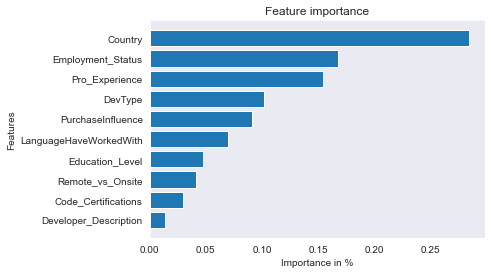

In [425]:
# function for feature importance
def feature_importance(pipe, X1res_train):
  name = X1res_train.columns
  importance = pipe[1].feature_importances_
  feat_imp = pd.Series(importance, index=name).sort_values(ascending=True)
  x = feat_imp.index
  y = feat_imp.values
  plt.barh(x, y)
  plt.ylabel('Features')
  plt.xlabel('Importance in %')
  plt.title('Feature importance');
  return None
# random forest feature importance
feature_importance(pipe_7t, X1res_train)

From the plot, it is observed that the feature `Country` has the highest effect on the model in the prediction of salaries while `Code_Certifications` and `Developer_Description` have the lowest effect

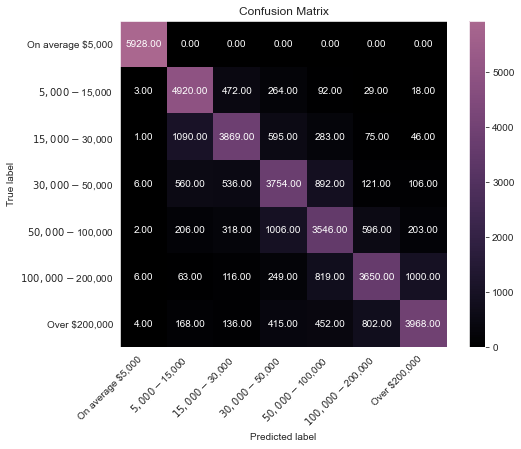

In [432]:


def confmat(ytrue, ypred):
    labels = ['On average $5,000', '$5,000 - $15,000', '$15,000 - $30,000',
              '$30,000 - $50,000', '$50,000 - $100,000', '$100,000 - $200,000', 'Over $200,000']
    label_order = [5, 3, 1, 2, 4, 0, 6]
    
    cm = confusion_matrix(ytrue, ypred, labels=label_order)
    #cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize the confusion matrix
    
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(cm, interpolation='nearest', cmap=sns.cubehelix_palette(50, hue=0.8, rot=0.4, light=0, dark=0.5, as_cmap=True))
    ax.figure.colorbar(im, ax=ax)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=labels,
           yticklabels=labels,
           xlabel='Predicted label',
           ylabel='True label',
           title='Confusion Matrix')
    
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    
    # Loop over data dimensions and create text annotations.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], '.2f'), ha="center", va="center", color = "white")
    
    plt.show()

# random forest confusion matrix
confmat(y1res_test, y_pred_7t)


## XG Boost

**XGBoost (Extreme Gradient Boosting)** is an **ensemble learning algorithm** whaich has been used for multiclass classification of salaries. It combines the predictions of multiple weak decision tree models in a sequential manner, utilizing gradient boosting to minimize a loss function and improve predictive accuracy.

In [433]:
# create a pipeline
class DataPipeline:
    def __init__(self):
        self.pipeline = None

    def fit(self, X_train, y_train):
        self.pipeline.fit(X_train, y_train)

    def predict_train(self, X_train):
        return self.pipeline.predict(X_train)

    def predict_test(self, X_test):
        return self.pipeline.predict(X_test)

    def create_pipeline(self):
        self.pipeline = Pipeline([('ss', StandardScaler()),
                                  ('xgb', xgb.XGBClassifier())])


data_pipe = DataPipeline()
data_pipe.create_pipeline()
data_pipe.fit(X1res_train, y1res_train)
y_trainpred_9 = data_pipe.predict_train(X1res_train)
y_pred_9 = data_pipe.predict_test(X1res_test)


print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_9)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_9)

training metrics
__________________________________
Precision Score: 0.7404360594931494
Recall Score: 0.7402965908620189
Accuracy Score: 0.7402965908620189
F1 Score: 0.739458137182195

test metrics
___________________________________
Precision Score: 0.6882696920503196
Recall Score: 0.6882928597317869
Accuracy Score: 0.6882928597317869
F1 Score: 0.6870941320911108


##### XG boost model summary Observation

XG boost holds the most promise as it has the least gap betweeen training and test metrics, thus less prone to overfitting. 

Below we **tune some hyperparameters and rerun the model**

In [434]:
class XGBModel:
    def __init__(self):
        self.model = None

    def fit(self, X_train, y_train):
        xgb_params = [{
            "xgb__max_depth": [4, 5, 7],
            "xgb__learning_rate": [0.1, 0.01],
            "xgb__gamma": [0.25, 0.5],
            "xgb__reg_lambda": [0, 1, 10],
            "xgb__subsample": [0.8],
            "xgb__colsample_bytree": [0.5],
        }]

        pipe_9 = Pipeline([
            ('xgb', XGBClassifier())
        ])

        gsv_xgb = GridSearchCV(estimator=pipe_9,
                               param_grid=xgb_params,
                               cv=5,
                               scoring='accuracy',
                               verbose=1)

        gsv_xgb.fit(X_train, y_train)
        self.model = gsv_xgb.best_estimator_

        print('Best params:', gsv_xgb.best_params_)
        print('Best estimator:', self.model)

    def predict(self, X_test):
        if self.model is not None:
            return self.model.predict(X_test)
        else:
            raise ValueError("Model has not been trained yet.")

    def predict_train(self, X_train):
        if self.model is not None:
            return self.model.predict(X_train)
        else:
            raise ValueError("Model has not been trained yet.")



# Create an instance of the XGBModel class
xgb_model = XGBModel()

# Fit the model
xgb_model.fit(X1res_train, y1res_train)

# Predict on test data
y_pred_9 = xgb_model.predict(X1res_test)
y_trainpred_9 = xgb_model.predict_train(X1res_train)


print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_9)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_9)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 80.1min finished


Best params: {'xgb__colsample_bytree': 0.5, 'xgb__gamma': 0.5, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__reg_lambda': 0, 'xgb__subsample': 0.8}
Best estimator: Pipeline(steps=[('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.5, gamma=0.5, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=7,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=0, scale_pos_weight=None,
                               subsampl


##### Lets tune the XGBoost model with the best parameters  

In [435]:
class XGBModel:
    def __init__(self):
        self.model = None
        self.pipe_10 = None

    def fit(self, X_train, y_train):
        xgb_params = [{
            "xgb__max_depth": [7],
            "xgb__learning_rate": [0.1],
            "xgb__gamma": [0.25],
            "xgb__reg_lambda": [0],
            "xgb__subsample": [0.8],
            "xgb__colsample_bytree": [0.5],
        }]

        pipe_9 = Pipeline([
            ('xgb', XGBClassifier())
        ])

        self.pipe_10 = Pipeline([
            ('ss', StandardScaler()),
            ('xgb', XGBClassifier(
                base_score=0.5, booster='gbtree',
                colsample_bylevel=1, colsample_bynode=1,
                colsample_bytree=0.5, gamma=0.25, gpu_id=-1,
                importance_type='gain',
                interaction_constraints='', learning_rate=0.1,
                max_delta_step=0, max_depth=7,
                min_child_weight=1, missing=True,
                monotone_constraints='()', n_estimators=100,
                n_jobs=0, num_parallel_tree=1,
                objective='multi:softprob', random_state=0,
                reg_alpha=0, reg_lambda=0, scale_pos_weight=None,
                subsample=0.8, tree_method='exact',
                validate_parameters=1, verbosity=None
            ))
        ])

        gsv_xgb = GridSearchCV(estimator=pipe_9,
                               param_grid=xgb_params,
                               cv=5,
                               scoring='accuracy',
                               verbose=1)

        gsv_xgb.fit(X_train, y_train)
        self.model = gsv_xgb.best_estimator_

        print('Best params:', gsv_xgb.best_params_)
        print('Best estimator:', self.model)

        self.pipe_10.fit(X_train, y_train)

    def predict(self, X_test):
        if self.model is not None:
            return self.model.predict(X_test)
        else:
            raise ValueError("Model has not been trained yet.")

    def predict_train(self, X_train):
        if self.model is not None:
            return self.model.predict(X_train)
        else:
            raise ValueError("Model has not been trained yet.")


# Create an instance of the XGBModel class
xgb_model = XGBModel()

# Fit the model
xgb_model.fit(X1res_train, y1res_train)

# Predict on test data using gsv_xgb model
y_pred_9 = xgb_model.predict(X1res_test)
y_trainpred_9 = xgb_model.predict_train(X1res_train)

# Predict on test data using pipe_10
y_pred_10 = xgb_model.pipe_10.predict(X1res_test)
y_trainpred_10 = xgb_model.pipe_10.predict(X1res_train)

print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_10)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_10)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.2min finished


Best params: {'xgb__colsample_bytree': 0.5, 'xgb__gamma': 0.25, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__reg_lambda': 0, 'xgb__subsample': 0.8}
Best estimator: Pipeline(steps=[('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.5, gamma=0.25, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=7,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=0, scale_pos_weight=None,
                               subsam

##### Tuned XG boost model summary Observation
After Tuning XGboost, our model accuracy got less



### Classification Matrix for XGboost


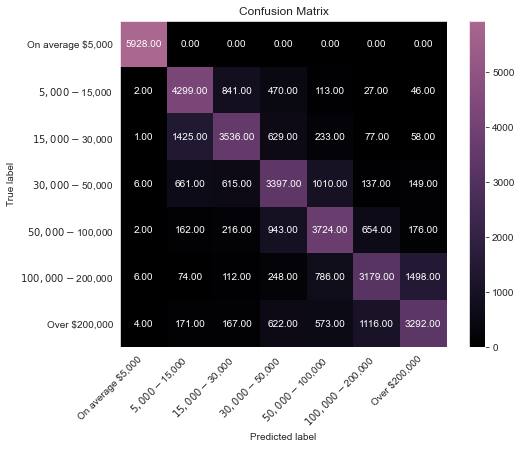

In [436]:
# Displaying XGboost confusion matrix
confmat(y1res_test, y_pred_10)

## Visualization for Model Evaluation

We will do a barplot to show each model and its train and test accuracy scores before and after tuning



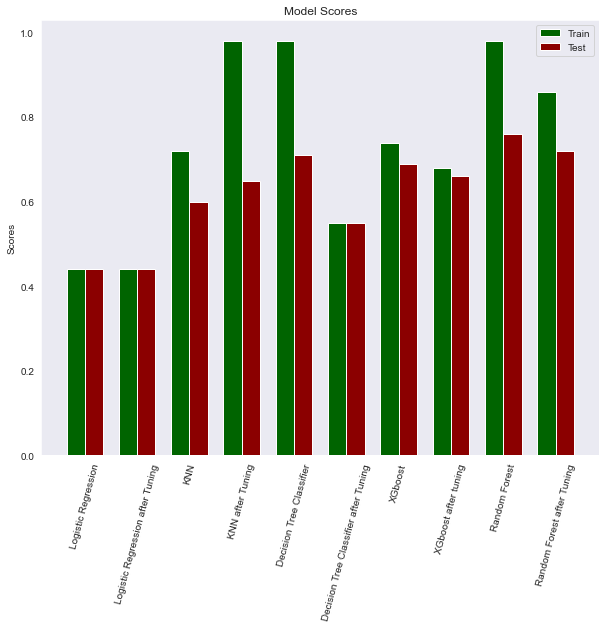

In [438]:
# Define the models and their scores
models = ['Logistic Regression', 'Logistic Regression after Tuning', 'KNN', 'KNN after Tuning', 'Decision Tree Classifier', 'Decision Tree Classifier after Tuning', 'XGboost', 'XGboost after tuning', 'Random Forest', 'Random Forest after Tuning']
train_scores = [0.44, 0.44, 0.72, 0.98, 0.98, 0.55, 0.74, 0.68, 0.98, 0.86]
test_scores = [0.44, 0.44, 0.60, 0.65, 0.71, 0.55, 0.69, 0.66, 0.76, 0.72]

# Set the positions and width of the bars
pos = np.arange(len(models))
width = 0.35

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 8))
train_bars = ax.bar(pos, train_scores, width, color='darkgreen')
test_bars = ax.bar(pos + width, test_scores, width, color='darkred')

# Add labels and title
ax.set_ylabel('Scores')
ax.set_title('Model Scores')
ax.set_xticks(pos + width / 2)
ax.set_xticklabels(models, rotation=75)
ax.legend((train_bars[0], test_bars[0]), ('Train', 'Test'))

plt.show()

### Model Visualisation Observation
From the visualization, Random Forest with tuned hyperparameters was our best model.



## Model Evaluation Summary

>> Description of Improvement

The improved accuracy score on the test data from 44% to 72% on the tuned Random Forest model indicates the percentage that was correct out of all the predictions our model made, the tuned Random Forest Model thus demostrated an improved estimation and prediction capabilities.

>> Justification for choice of evaluation metrics

Accuracy score provides a holistic view of the overall performance of our model , it answers the question out of all the predictions our model made, what percentage was correct..


### Simulation 1: Model Variable

In [439]:
finalf = [column for column in finalf if column != 'Annual_Salary']

In [440]:
test1 = ['Udemy', 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', 'Employed, full-time', 'I have some influence',
         'canada', 7.0, 'Fully remote', 'Data scientist or machine learning specialist', 'JavaScript', 'I am a developer by profession']

cols = list(df[finalf].columns)
testdf = pd.DataFrame([test1], columns=df[finalf].columns)
testdf

,Code_Certifications,Education_Level,Employment_Status,PurchaseInfluence,Country,Pro_Experience,Remote_vs_Onsite,DevType,LanguageHaveWorkedWith,Developer_Description
0,Udemy,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time",I have some influence,canada,7.0,Fully remote,Data scientist or machine learning specialist,JavaScript,I am a developer by profession


In [441]:
# map data to encoding

dev_type = {'Developer, full-stack':16, 'Developer, front-end':15
,'Developer, back-end':14,'None of the Above':0,'Data scientist or machine learning specialist':27,'Engineer, data':26,'Developer, mobile':17,
'Developer, desktop or enterprise applications':18,'Student':2,'Other (please specify):':1,'Engineer, site reliability':20,
'Engineering manager':25,'Developer, embedded applications or devices':19,
'Academic researcher':3,'DevOps specialist':12,
'Developer, QA or test':28,'Educator':6,'Senior Executive (C-Suite, VP, etc.)':29,'Data or business analyst':21,'Project manager':11,
'Developer, game or graphics':22,'System administrator':10,'Cloud infrastructure engineer':23,'Database administrator':7,'Product manager':9,
'Security professional':24,'Scientist':13,'Designer':5,'Marketing or sales professional':4,'Blockchain':8}

# function to encode test data
def encode_test(data):
  data['PurchaseInfluence'] = data['PurchaseInfluence'].map(PI)
  data['Education_Level'] = data['Education_Level'].map(EL)
  data['Employment_Status'] = data['Employment_Status'].map(ES)
  data['Code_Certifications'] = data['Code_Certifications'].map(CC)
  data['Country'] = data['Country'].map(country_code)
  data['Remote_vs_Onsite'] = data['Remote_vs_Onsite'].map(RO)
  data['LanguageHaveWorkedWith'] = data['LanguageHaveWorkedWith'].map(programming_lang)
  data['Developer_Description'] = data['Developer_Description'].map(dev_desc)
  data['DevType'] = data['DevType'].map(dev_type)

  return data

testdf = encode_test(testdf)

In [442]:
testdf

,Code_Certifications,Education_Level,Employment_Status,PurchaseInfluence,Country,Pro_Experience,Remote_vs_Onsite,DevType,LanguageHaveWorkedWith,Developer_Description
0,1,6,8,2,NaN,7.0,0,27,42,0


### Simulation 2: Picked Model

In [443]:
data = {"model": pipe_7t, "le_target": le}
with open('model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [444]:
import pickle

data = {"model": pipe_7, "le_target": le}
with open('model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [445]:
with open('model.pkl', 'rb') as file:
    data = pickle.load(file)

dt = data['model'] # load model
le = data['le_target'] # load target label encoder

test1 = ['Udemy', 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', 'Employed, full-time', 'I have some influence',
         'United States of America', 7.0, 'Fully remote', 'Data scientist or machine learning specialist', 'JavaScript', 'I am a developer by profession']

cols = list(df[finalf].columns)
testdf = pd.DataFrame([test1], columns=df[finalf].columns)
testdf

# encode test data
testdf = encode_test(testdf)

# predict
response = dt.predict(testdf)
print('The predicted annual salary is between: ', le.inverse_transform(response)[0])

The predicted annual salary is between:  $100,000 - $200,000


## Limitation

1. **Imbalanced salary distribution**: Based on our visualizations, we witnessed a disproportionate number of individuals in certain salary ranges, this influenced biasness towards predicting the majority class and made our model struggle to accurately predict the less-represented salary ranges.

2. **Overfitting**: Random Forest Classifier has the potential to overfit the training data due to its high model complexity, especially when there are many input features compared to the number of observations(high dimensionality). Overfitting resulted in high training accuracy but lower generalization performance on unseen data, leading to inaccurate salary range predictions.

3. For a student with zero experience the model would always suggest a range of $0 - $5,000 irregardless of other variables, this would have been addressed if we had more data on students who were earning.

4. To avoid the increase in columns, thus increase in dimensionality caused by binary encoding, Categorical columns were assigned a unique numerical value to each category of a feature, disregarding any order it may have had. The numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them, therefore, reducing the performance of the model.


# Conclusion



As the tech industry in Africa continues to grow, it creates the need to have a reliable platform that can accurately predict salaries of developers based on their different skillsets and experience. This would assist job seekers to ask for competitive salaries, provide employers with an accurate source of data to use in their salary offers, and recruiters to accurately advice their clients on renumeration expectations.

This project utilizes machine learning models to predict these salaries. 

The output of these models can be accessed through a web application by following this [link](https://3881-34-82-132-163.ngrok-free.app/)

## Next Steps 


To further improve this project, collection of more data, especially of salaries from the under-represented regions such as Africa, would greatly improve the performance of the prediction model.